In [49]:
#Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os 

# Load in excel file and define future save directory
indonesia = pd.ExcelFile(r"D:\Projects\TMU\gee_dengue\Dengue_IN\DENGUE MONTHLY DATA.xlsx")
save_dir = r"D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321"

Set variables and clean up data.

In [50]:
def rename_excel_sheets(excel_path):
    '''Function to load in whole excel sheet, load in as individual dataframes, and rename columns.'''
    excel_file = pd.ExcelFile(excel_path)
    sheet_names = excel_file.sheet_names
    
    if len(sheet_names) > 14:
        raise ValueError("Excel file has more than 14 sheets, cannot map to 2010-2023 range.")
    
    new_names = [f"in_{year}" for year in range(2010, 2010 + len(sheet_names))]
    
    dataframes = {new_name: excel_file.parse(sheet_name=old_name) for old_name, new_name in zip(sheet_names, new_names)}
    
    rename_dict = {3: 'Infection_1', 4: 'Death_1',
                   5: 'Infection_2', 6: 'Death_2',
                   7: 'Infection_3', 8: 'Death_3',
                   9: 'Infection_4', 10: 'Death_4',
                   11: 'Infection_5', 12: 'Death_5',
                   13: 'Infection_6', 14: 'Death_6',
                   15: 'Infection_7', 16: 'Death_7',
                   17: 'Infection_8', 18: 'Death_8',
                   19: 'Infection_9', 20: 'Death_9',
                   21: 'Infection_10', 22: 'Death_10',
                   23: 'Infection_11', 24: 'Death_11',
                   25: 'Infection_12', 26: 'Death_12'}
    
    for name, df in dataframes.items():
        # Rename columns
        df.columns = [rename_dict[i] if i in rename_dict else col for i, col in enumerate(df.columns)]
        
        # Drop the first row (index 0)
        df.drop(index=0, inplace=True)
        
        # Create a global variable with the name corresponding to the sheet
        globals()[name] = df

    # Optionally, return None, as DataFrame instances are now created in the global scope


In [51]:
rename_excel_sheets(indonesia)

Functions to plot yearly, multi-yearly trend curves.

Plot for 2010 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2010.png
Plot for 2011 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2011.png
Plot for 2012 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2012.png
Plot for 2013 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2013.png
Plot for 2014 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2014.png
Plot for 2015 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2015.png
Plot for 2016 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2016.png
Plot for 2017 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2017.png
Plot for 2018 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2018.png
Plot for 2019 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend

KeyboardInterrupt: 

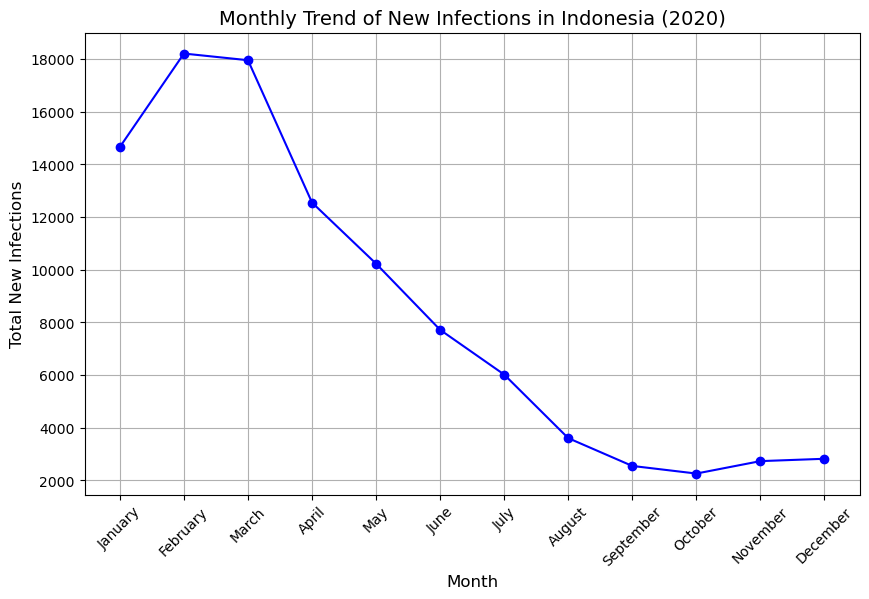

In [52]:
def plot_infection_trend(df, year, save_dir):
    """
    Summarize monthly infection data and save the plot for a given year.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing infection data for a specific year.
    - year (int): The year corresponding to the dataframe.
    - save_dir (str): The directory to save the plot image.
    
    The dataframe must contain columns 'Infection_1' to 'Infection_12', 
    each representing infection counts for each month from January to December.
    """
    # List of columns representing infection counts from January to December
    infection_columns = ['Infection_1', 'Infection_2', 'Infection_3', 'Infection_4', 
                         'Infection_5', 'Infection_6', 'Infection_7', 'Infection_8', 
                         'Infection_9', 'Infection_10', 'Infection_11', 'Infection_12']

    # Check if the infection columns exist in the dataframe
    if not all(col in df.columns for col in infection_columns):
        print(f"One or more infection columns are missing in {year} data.")
        return

    # Exclude the first row (index 0) as it is null and we only want data from states
    df_clean = df[infection_columns].iloc[1:]  # Exclude first row

    # Convert all columns to numeric (to avoid issues with non-numeric values)
    df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

    # Handle missing values: Filling missing values with 0 (or another strategy)
    df_clean = df_clean.fillna(0)

    # Sum the infection data across all rows (states)
    monthly_totals = df_clean.sum(axis=0)

    # Ensure the monthly totals have exactly 12 values
    if len(monthly_totals) == 12:
        # Create a list of month names
        months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                  'September', 'October', 'November', 'December']

        # Plot the curve
        plt.figure(figsize=(10, 6))
        plt.plot(months, monthly_totals, marker='o', linestyle='-', color='b', label=f'New Infections ({year})')
        plt.title(f'Monthly Trend of New Infections in Indonesia ({year})', fontsize=14)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Total New Infections', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()

        # Save the plot as a file in the specified directory
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)  # Create directory if it doesn't exist
        save_path = os.path.join(save_dir, f'infection_trend_{year}.png')
        plt.savefig(save_path)

        # Close the plot to free memory
        plt.close()
        print(f"Plot for {year} saved at {save_path}")
    else:
        print(f"The data structure is incorrect for {year} data. Please check the infection columns.")

# For loop to plot annual plots for 2010 to 2023
for year in range(2010, 2024):  # Loop from 2010 to 2023
    in_data = globals().get(f'in_{year}')  # Dynamically access in_2010, in_2011, ..., in_2023
    plot_infection_trend(in_data, year, save_dir)


In [ ]:
in_2010

Province             City  City/Regency Infection_1 Death_1  \
1          Aceh  Aceh Barat Daya       Regency           0       0   
2          Aceh       Aceh Barat       Regency           2       0   
3          Aceh       Aceh Besar       Regency          48       0   
4          Aceh        Aceh Jaya       Regency           0       0   
5          Aceh     Aceh Selatan       Regency          21       0   
..          ...              ...           ...         ...     ...   
440  Yogyakarta           Bantul       Regency         206       0   
441  Yogyakarta     Gunung Kidul       Regency         183       2   
442  Yogyakarta      Kulon Progo       Regency          52       0   
443  Yogyakarta           Sleman       Regency         148       1   
444  Yogyakarta       Yogyakarta  Municipality          70       0   

    Infection_2 Death_2 Infection_3 Death_3 Infection_4  ... Death_10  \
1             0       0           0       0           0  ...        0   
2             5       1           5       0           1  ...        0   
3            26       0          37       0          60  ...        1   
4             0       0           1       0           3  ...        0   
5            24       0          13       0           4  ...        0   
..          ...     ...         ...     ...         ...  ...      ...   
440         151       3         152       3         166  ...        0   
441         204       4         200       1         143  ...        0   
442          56       0          77       2          57  ...        0   
443         120       1          83       0          71  ...        0   
444          95       1         162       0         152  ...        0   

    Infection_11 Death_11 Infection_12 Death_12 Total Incidence Total Death  \
1              0        0            1        0             1.0         0.0   
2              1        0            0        0            27.0         1.0   
3             58        0           81        2           539.0         3.0   
4              0        0            0        0             6.0         0.0   
5              6        0            9        0           108.0         0.0   
..           ...      ...          ...      ...             ...         ...   
440           97        0           76        0          1516.0         8.0   
441            5        1            2        1           944.0        14.0   
442           31        0           30        0           467.0         4.0   
443           21        0           30        0           600.0         2.0   
444           89        0           81        1          1470.0         6.0   

    IR per 100000       CFR Population  
1        0.870686  0.000000   114852.0  
2       17.810731  3.703704   151594.0  
3      180.108533  0.556586   299264.0  
4        9.004682  0.000000    66632.0  
5       57.170384  0.000000   188909.0  
..            ...       ...        ...  
440    182.221394  0.527704   831955.0  
441    131.559876  1.483051   717544.0  
442    101.691741  0.856531   459231.0  
443      65.09336  0.333333   921753.0  
444    284.009127  0.408163   517589.0  

[444 rows x 32 columns]

Plot for Sumatra (2010) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2010\infection_trend_Sumatra_2010.png
Plot for Sumatra (2011) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2011\infection_trend_Sumatra_2011.png
Plot for Sumatra (2012) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2012\infection_trend_Sumatra_2012.png


C:\Users\Patrick\AppData\Local\Temp\ipykernel_2836\4236953798.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


Plot for Sumatra (2013) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2013\infection_trend_Sumatra_2013.png
Plot for Sumatra (2014) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2014\infection_trend_Sumatra_2014.png
Plot for Sumatra (2015) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2015\infection_trend_Sumatra_2015.png
Plot for Sumatra (2016) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2016\infection_trend_Sumatra_2016.png
Plot for Sumatra (2017) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2017\infection_trend_Sumatra_2017.png
Plot for Sumatra (2018) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2018\infection_trend_Sumatra_2018.png
Plot for Sumatra (2019) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2019\infection_trend_Sumatra_2019.png
Plot for Sumatra (2020) saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\2020\infection_trend_Sumatra_2020.png
Plot for

KeyboardInterrupt: 

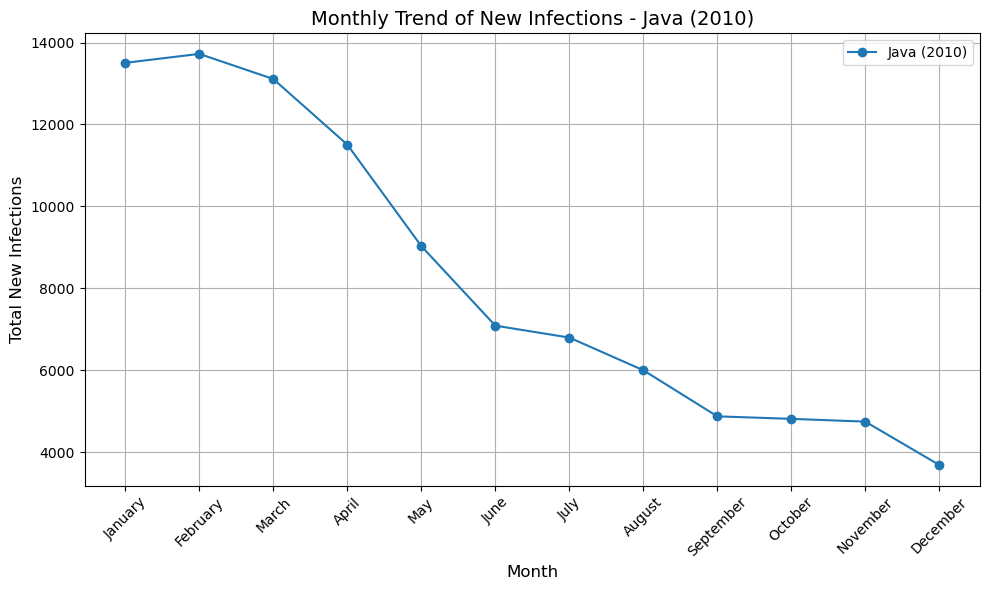

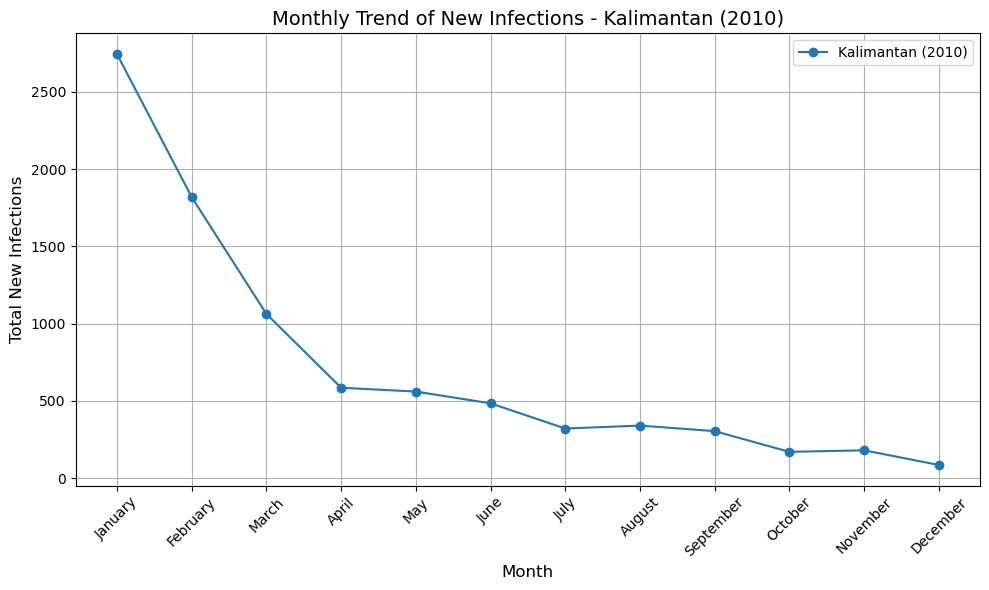

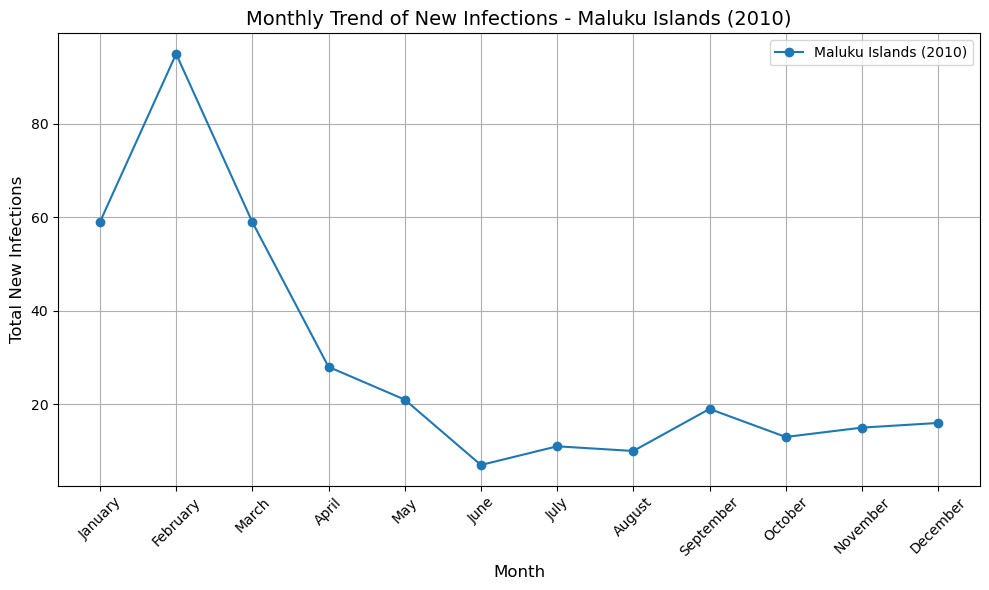

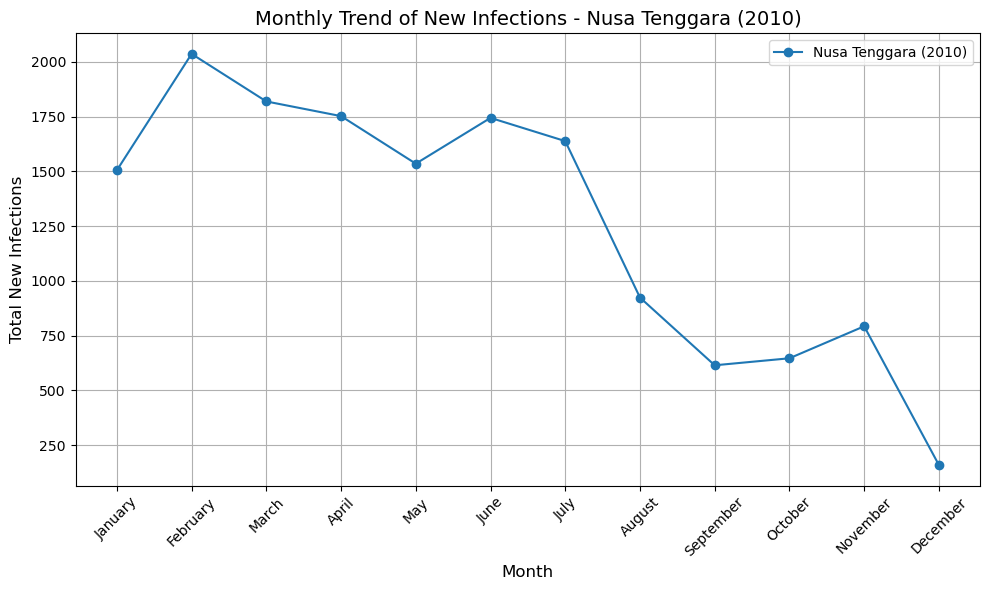

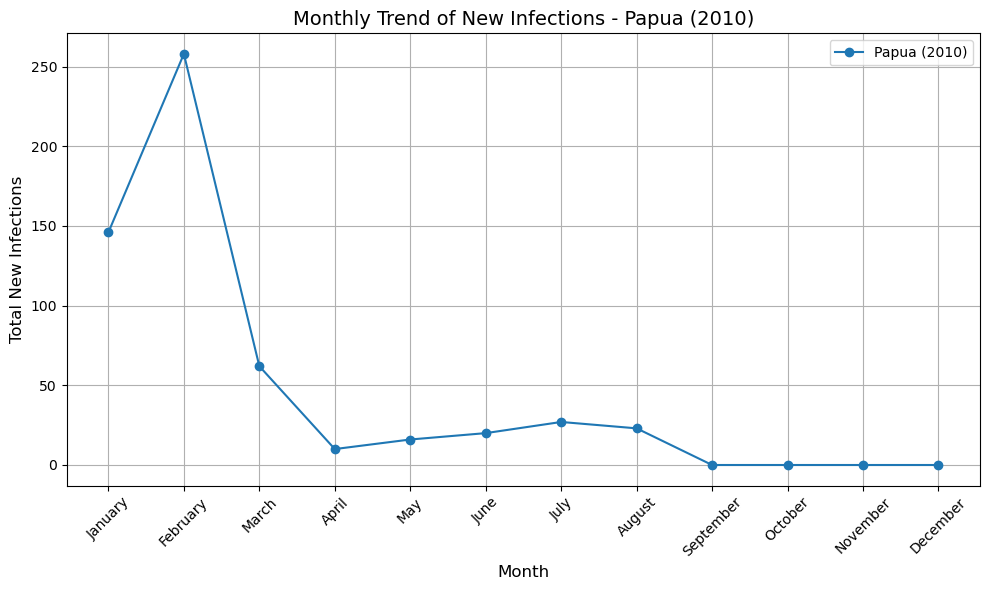

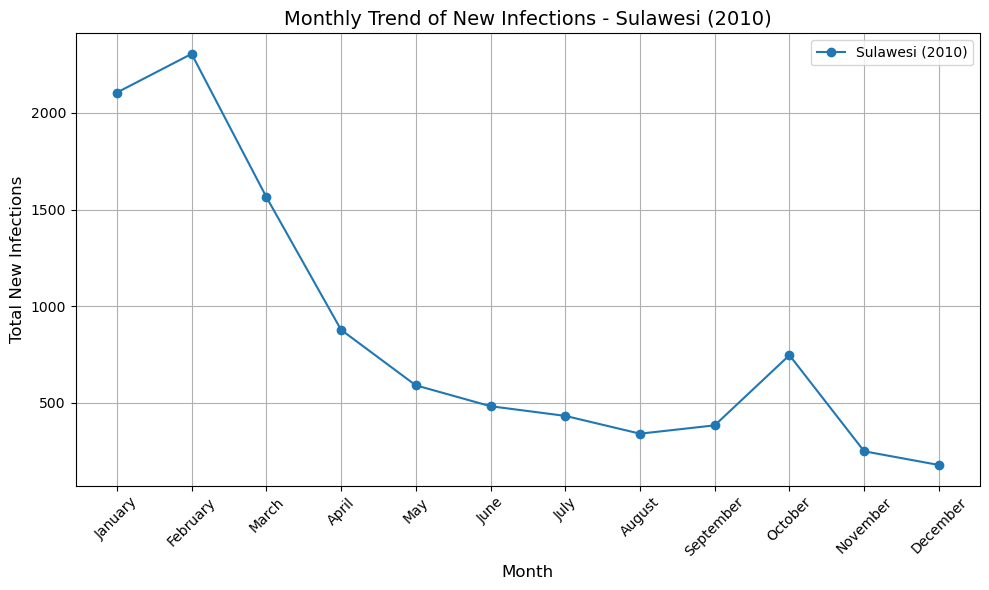

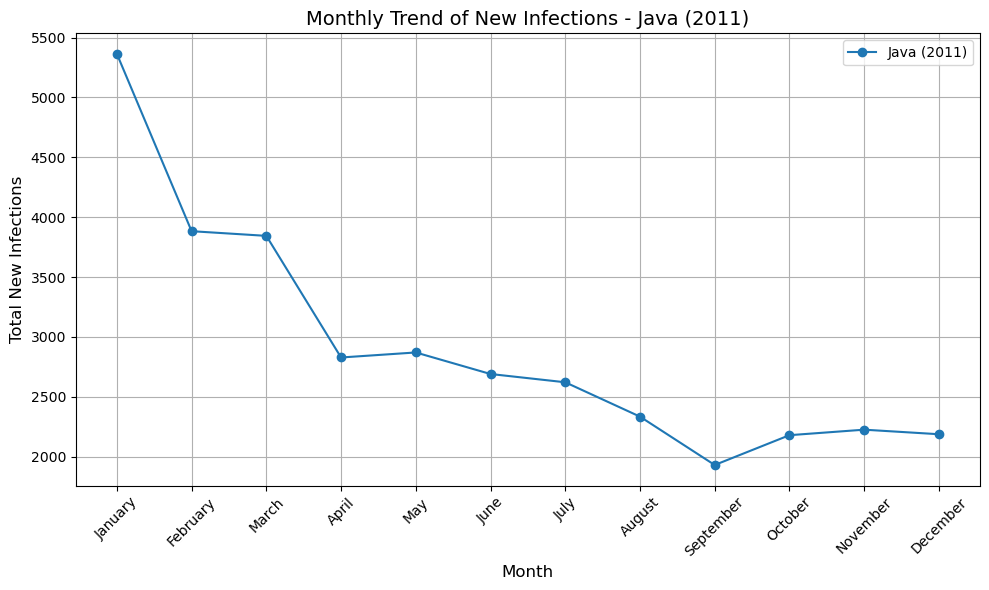

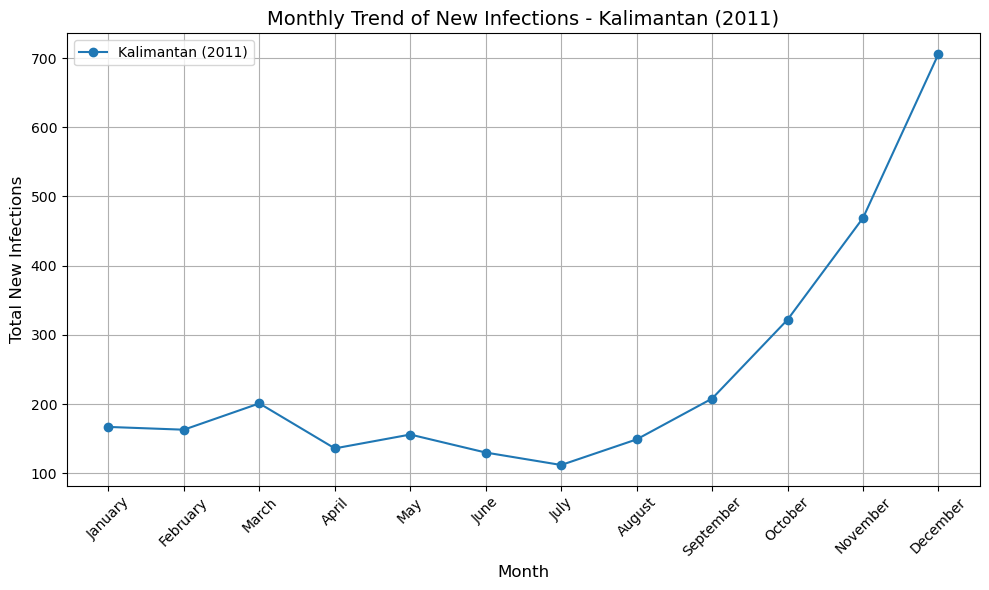

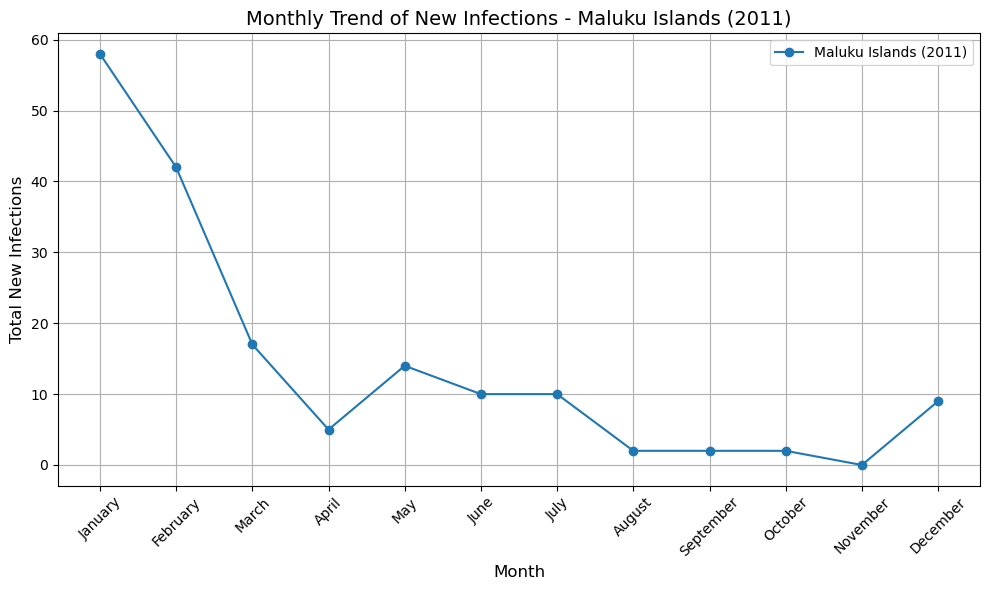

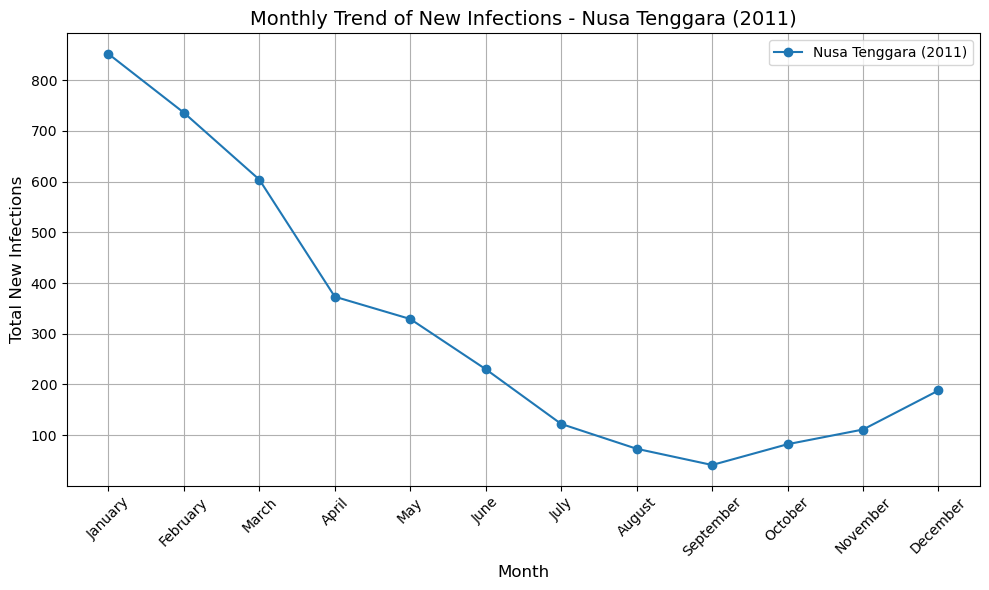

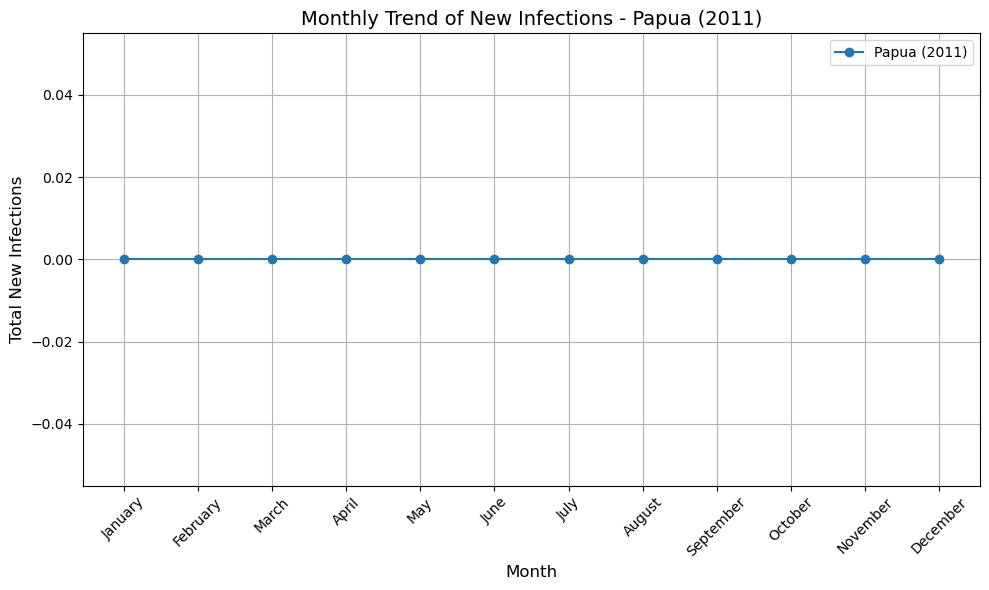

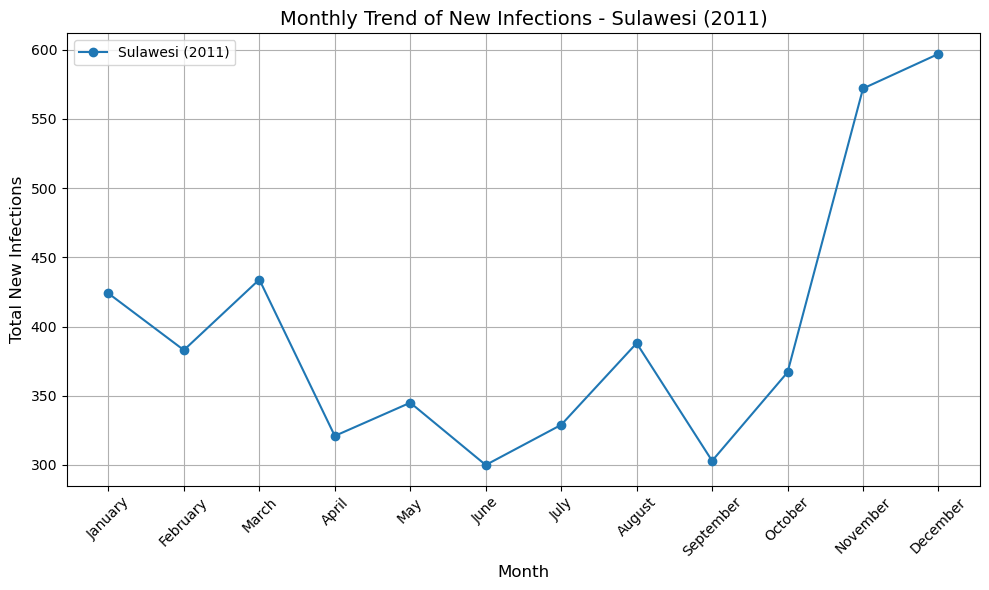

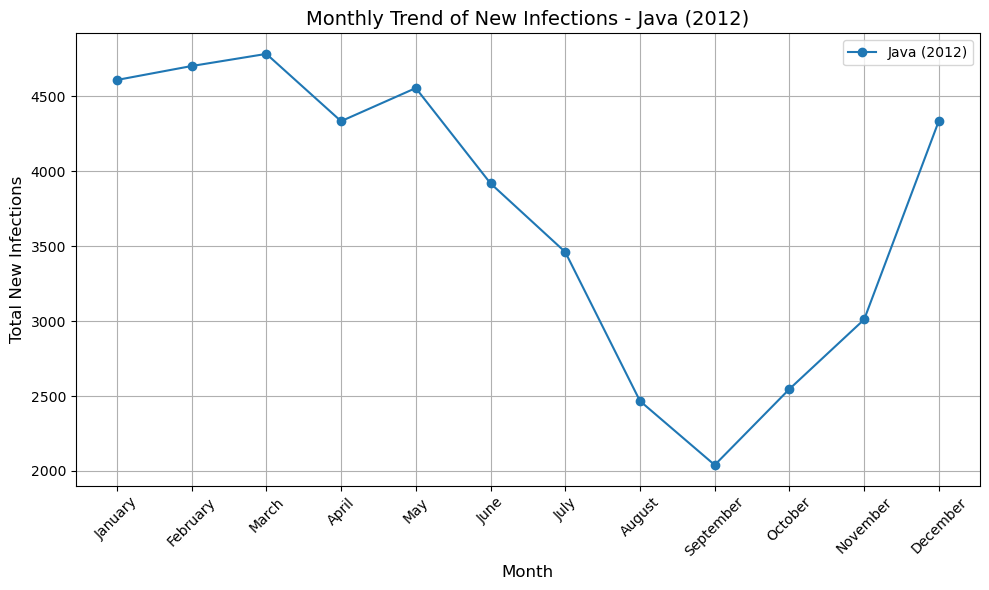

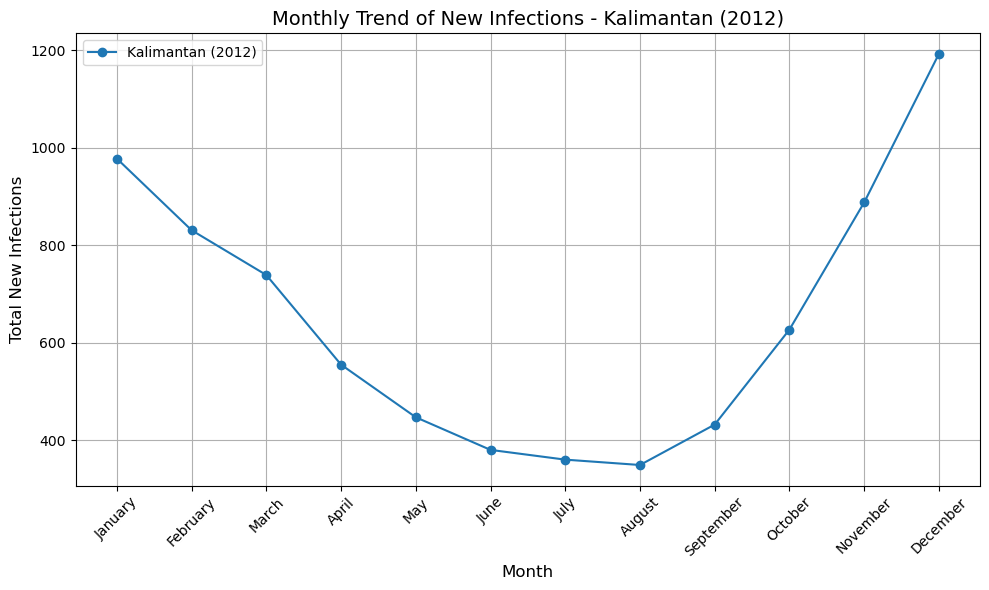

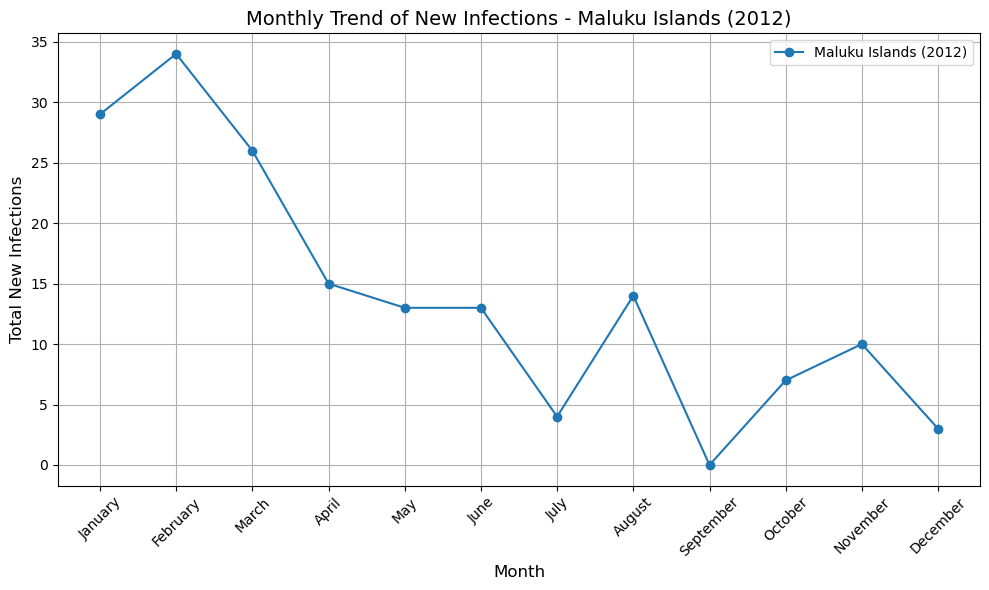

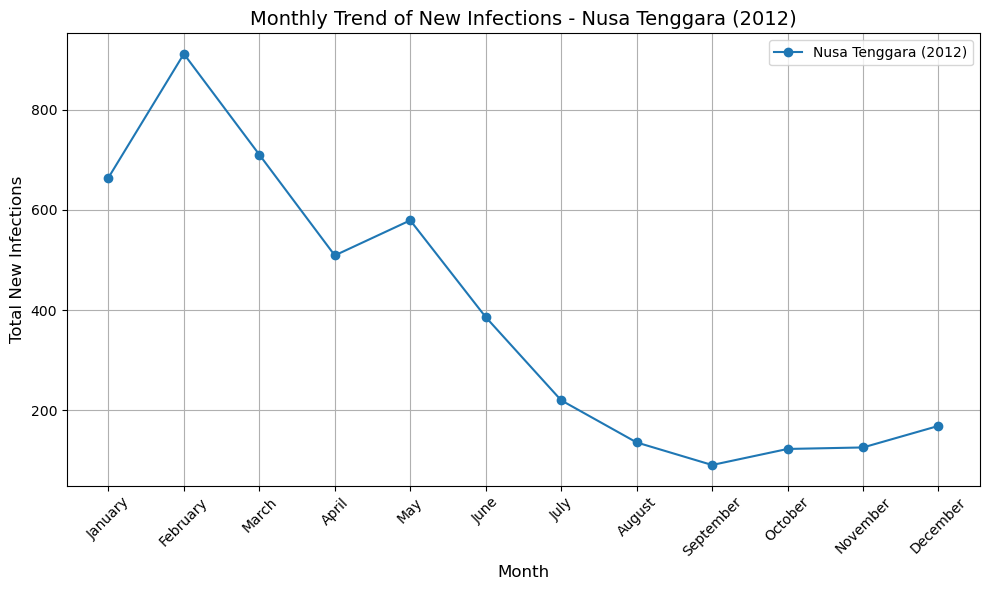

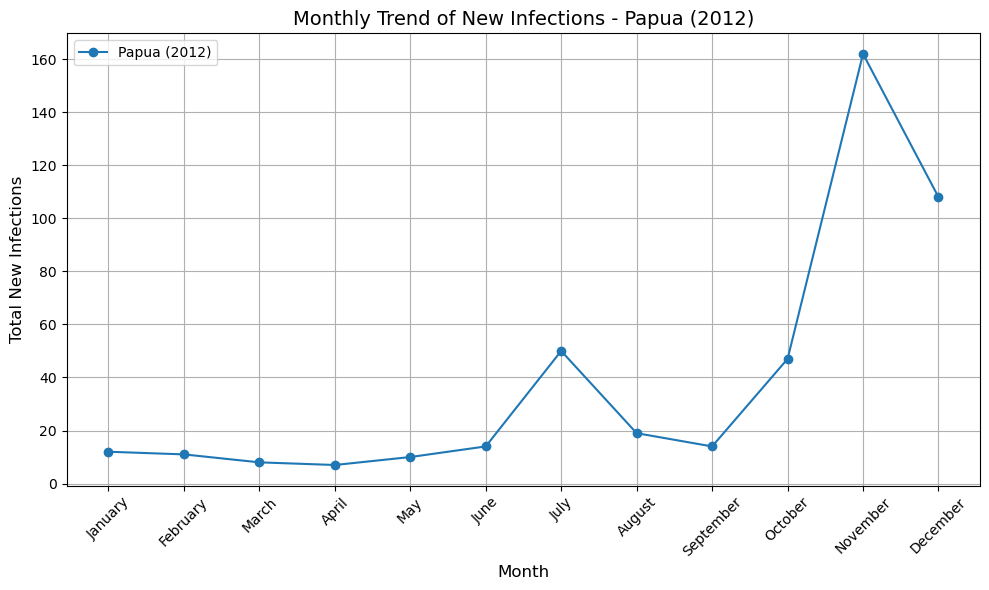

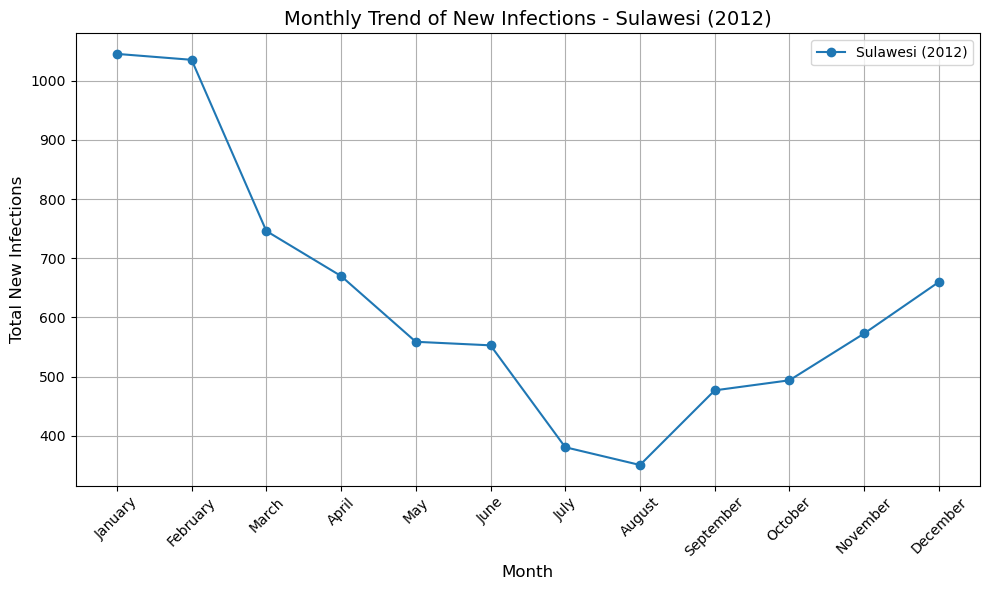

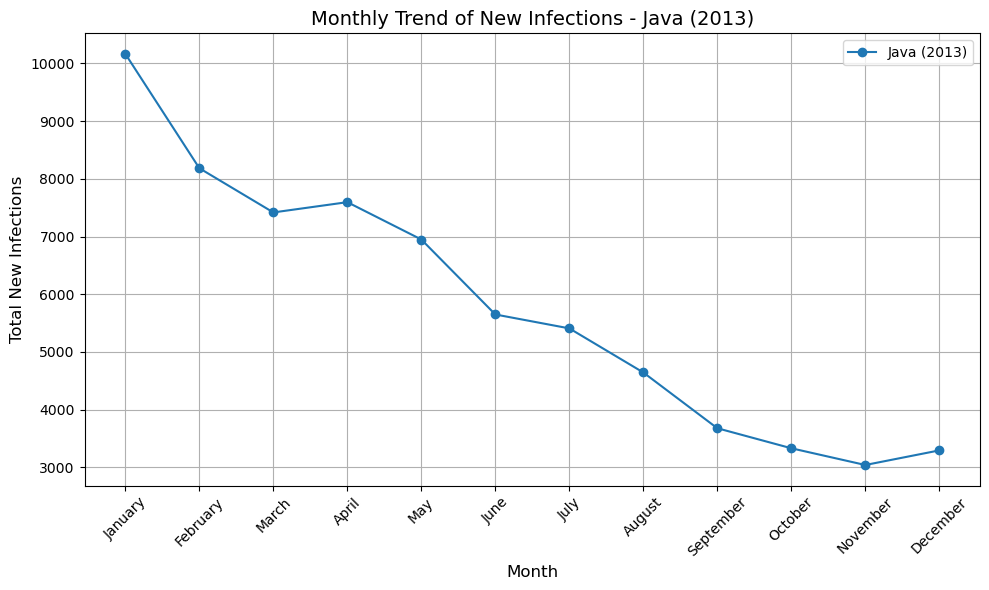

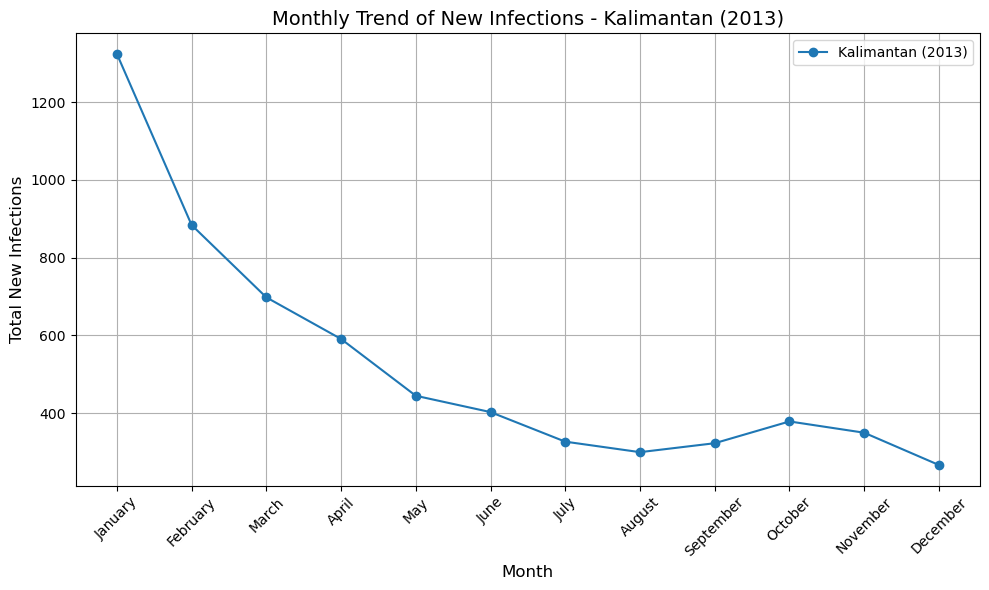

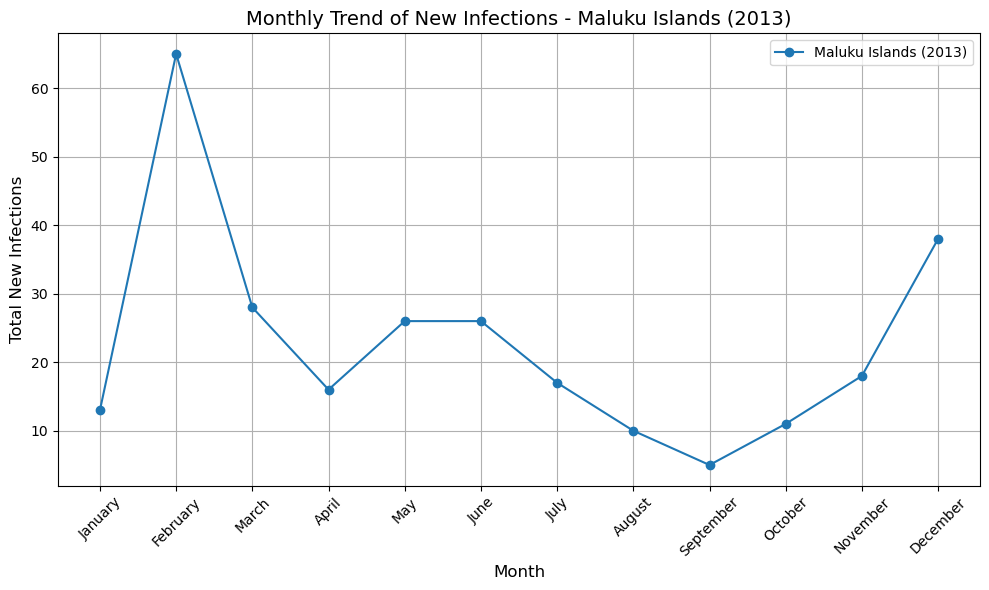

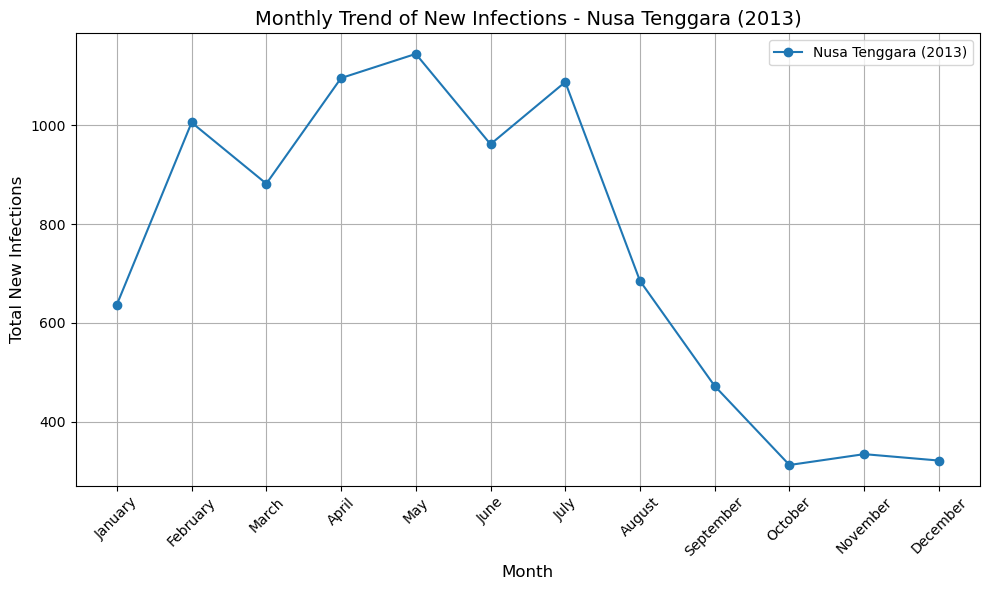

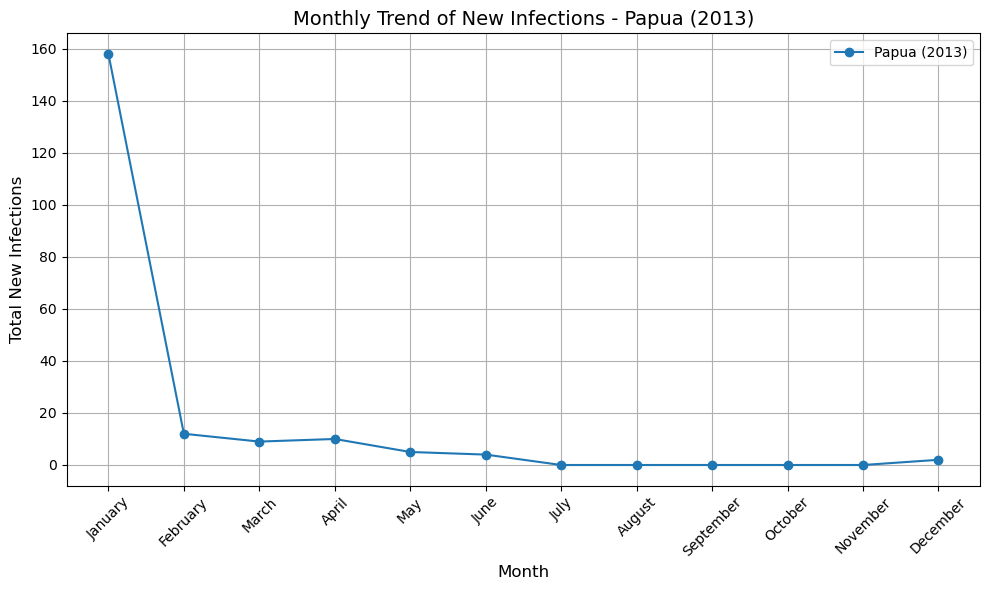

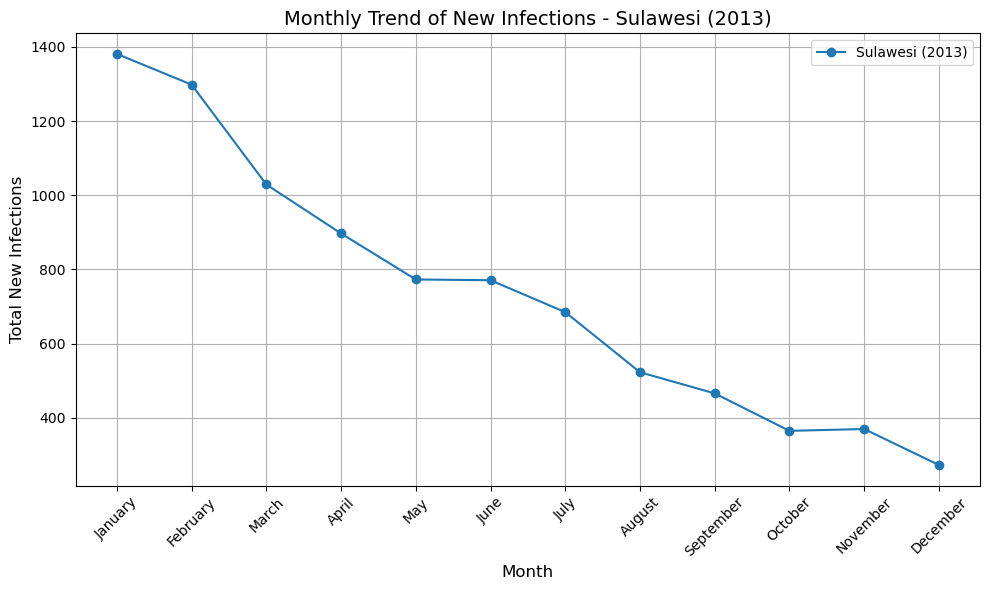

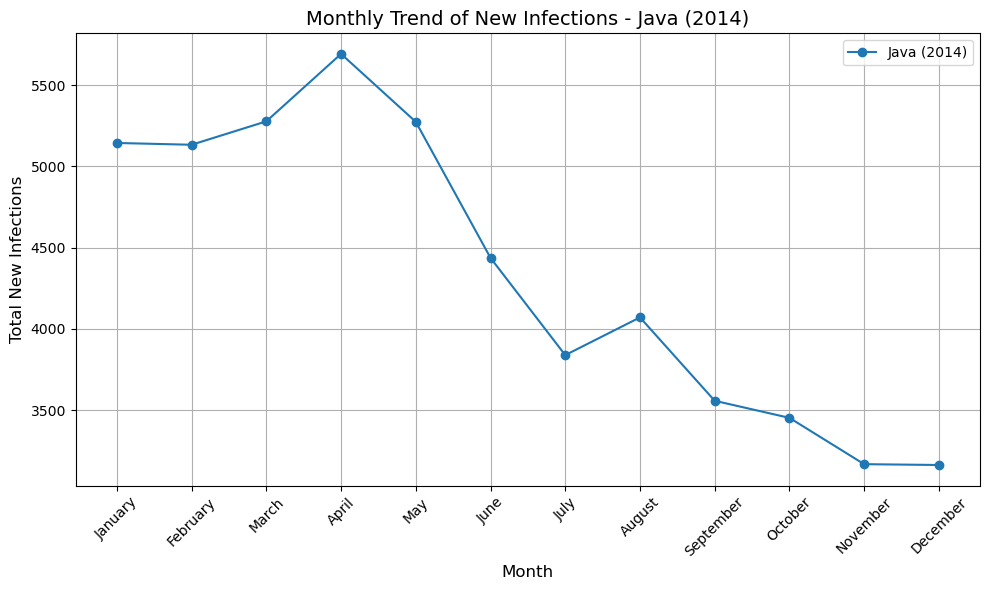

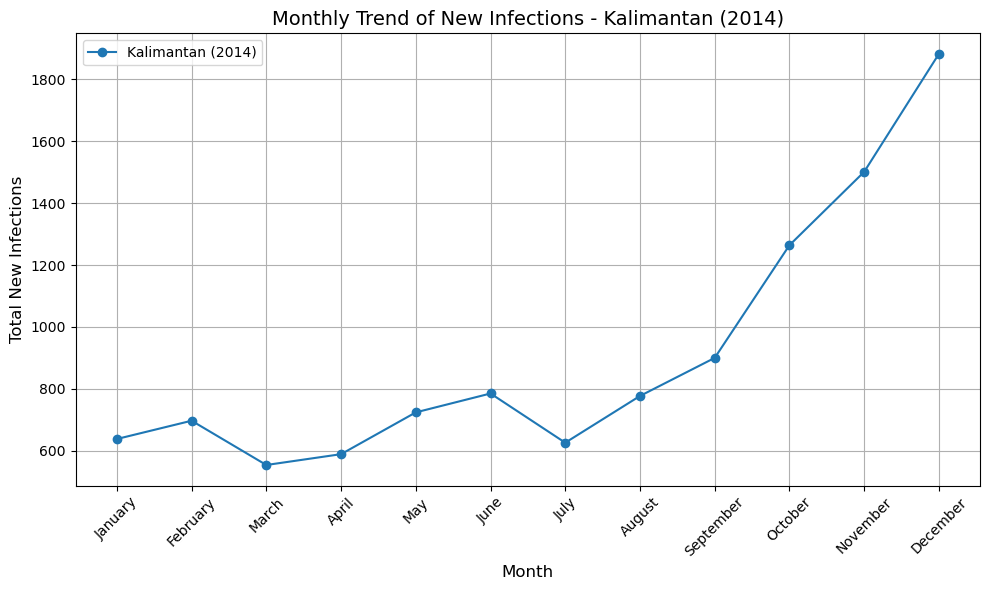

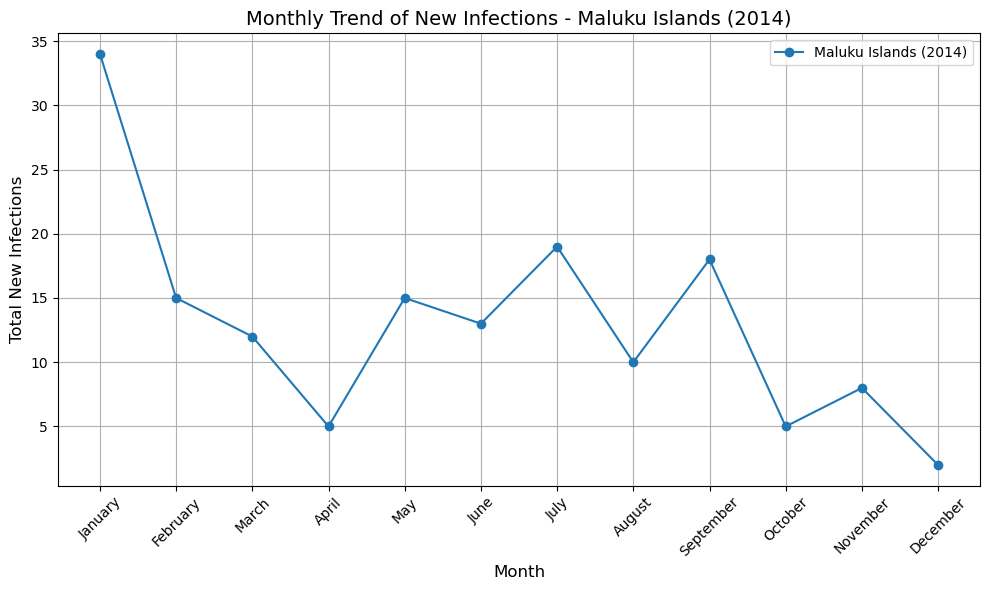

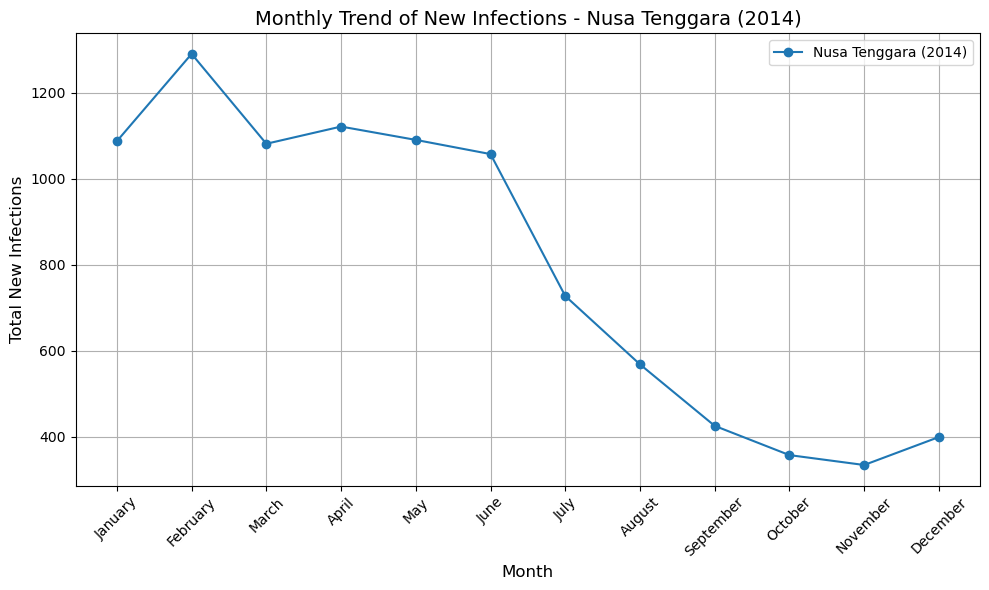

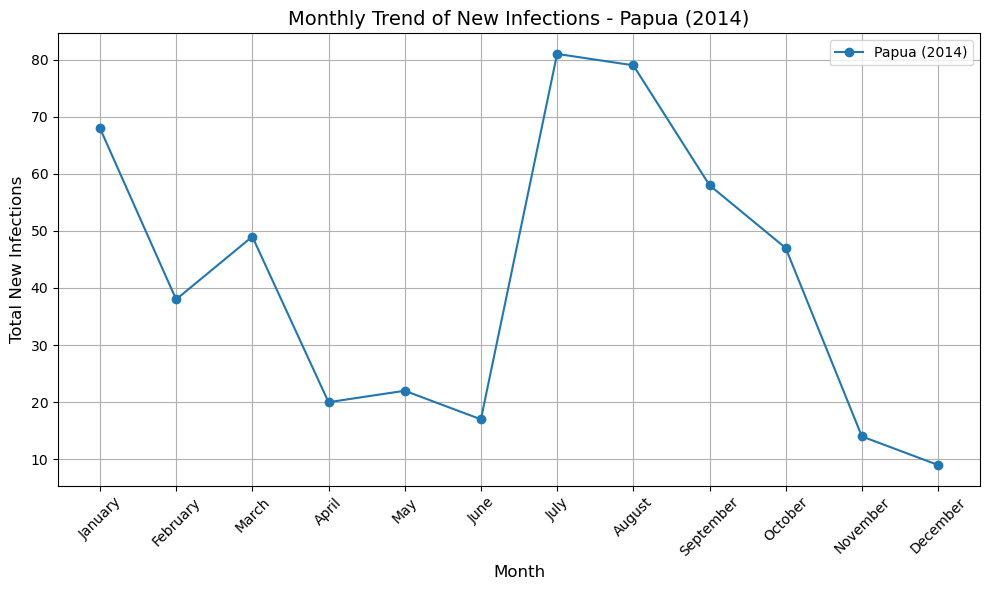

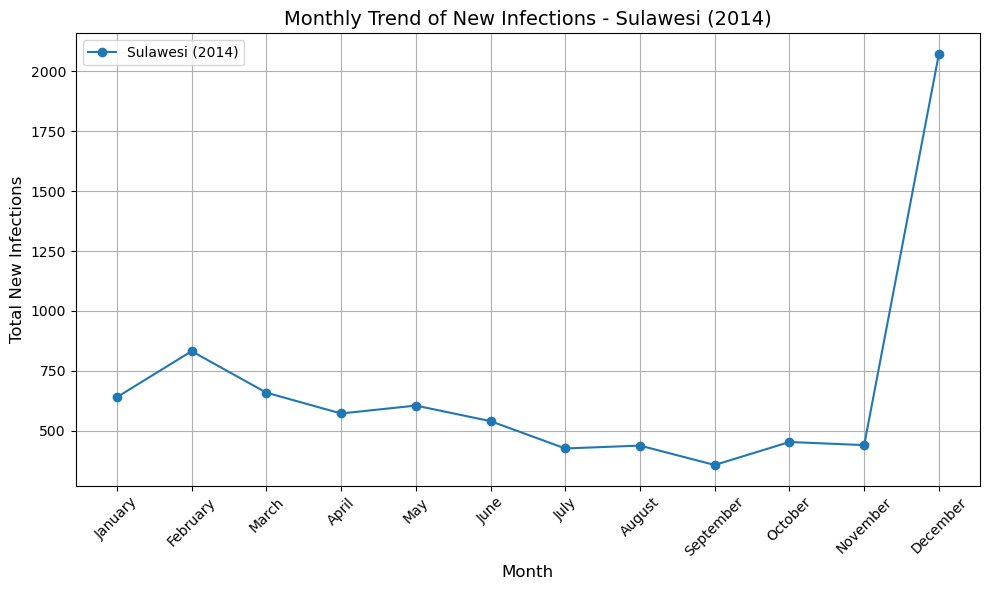

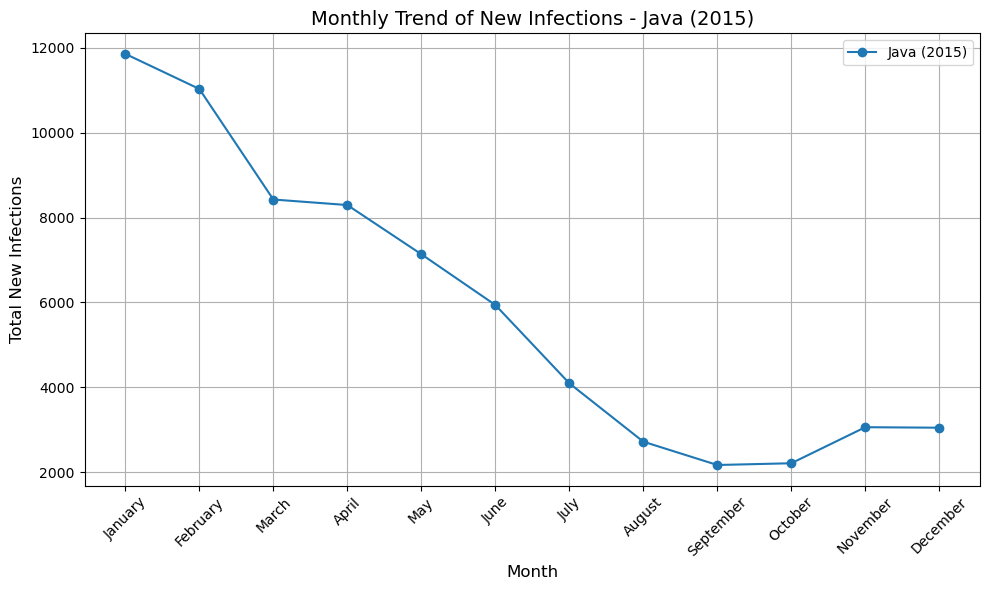

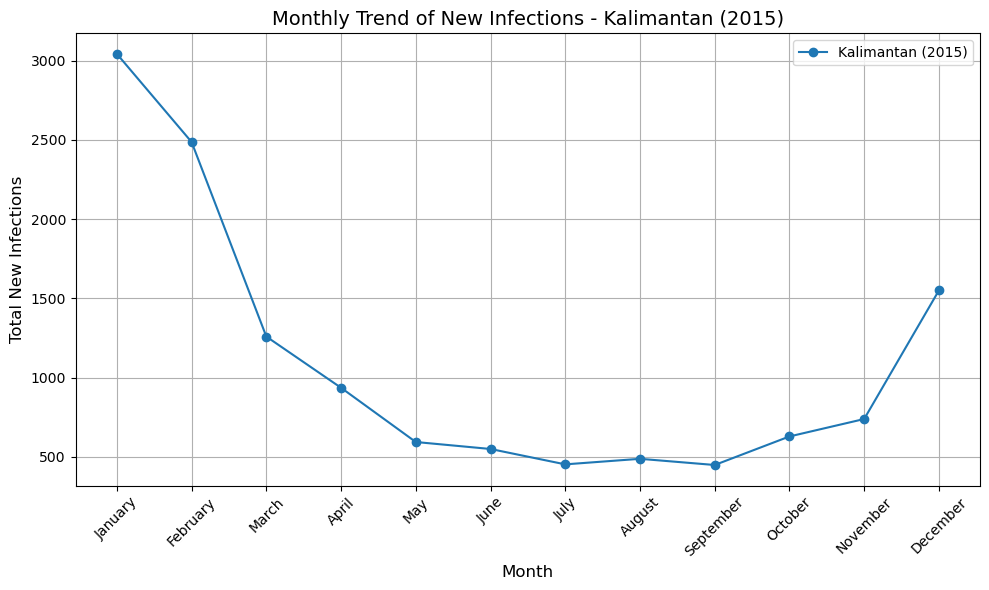

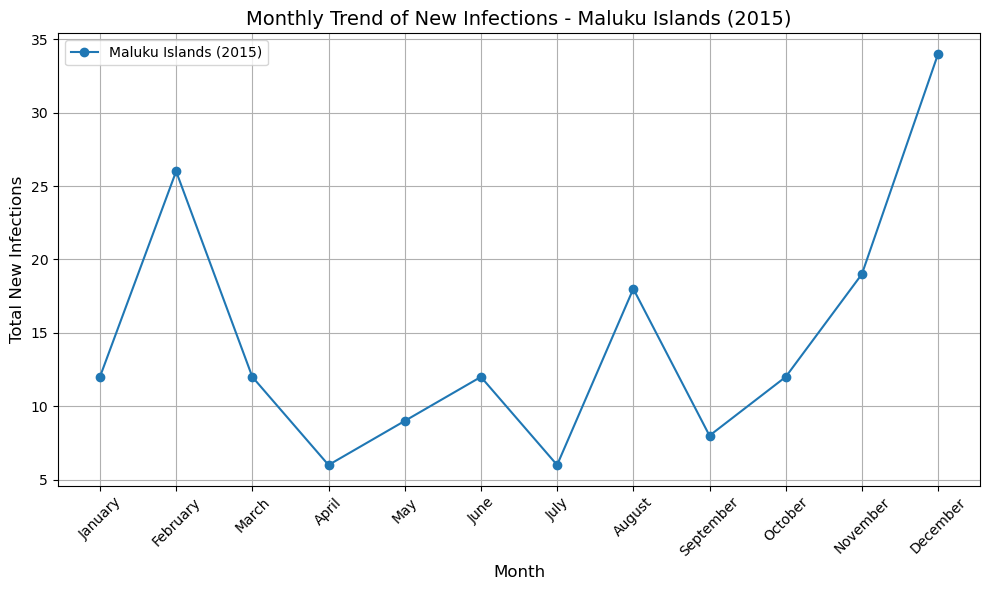

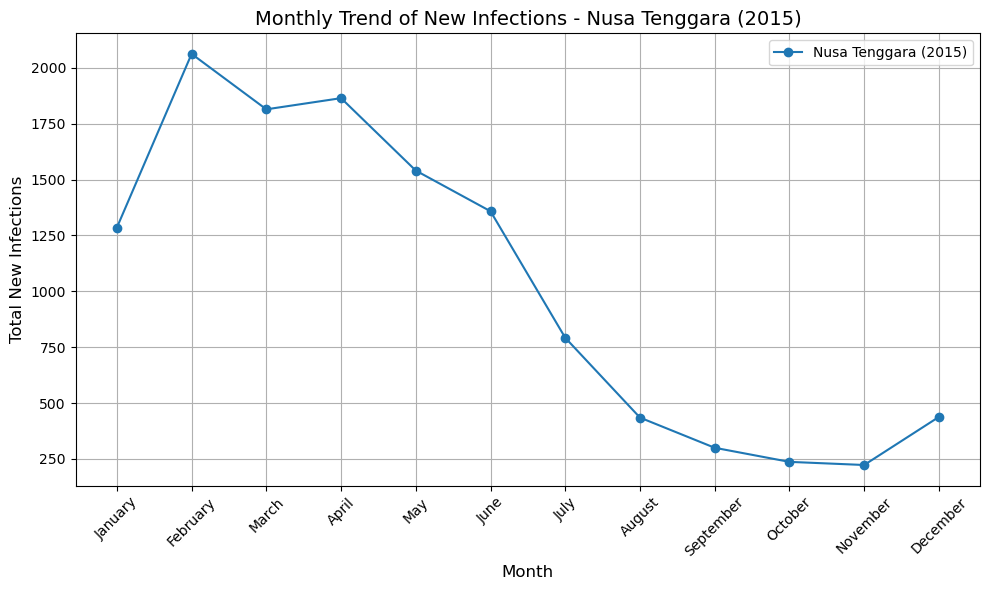

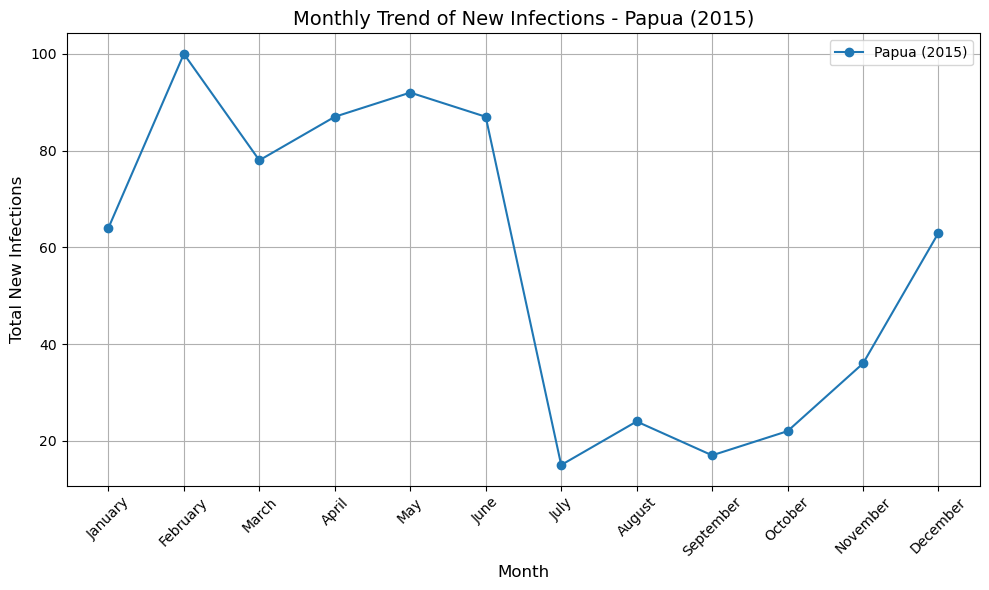

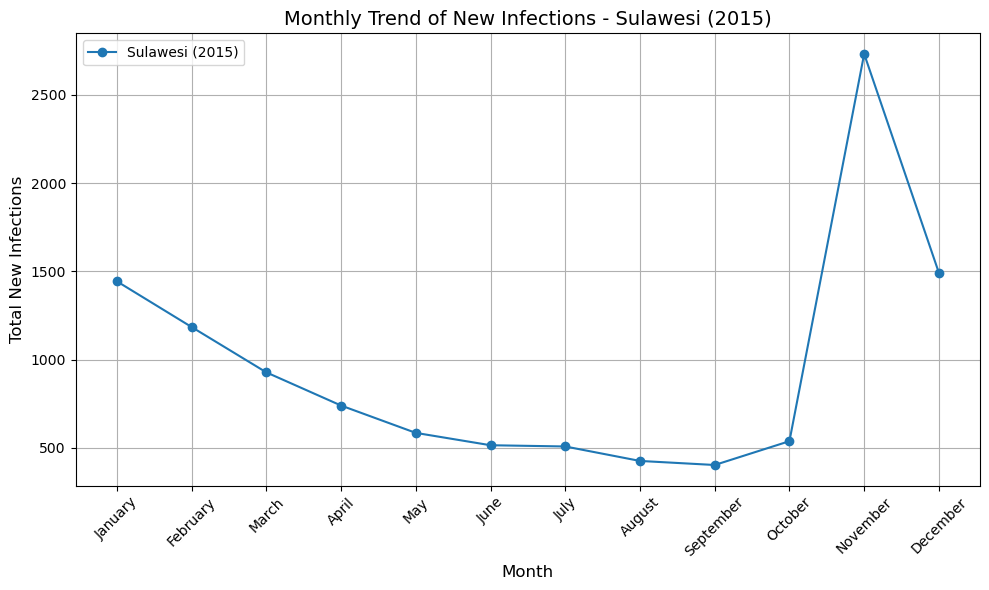

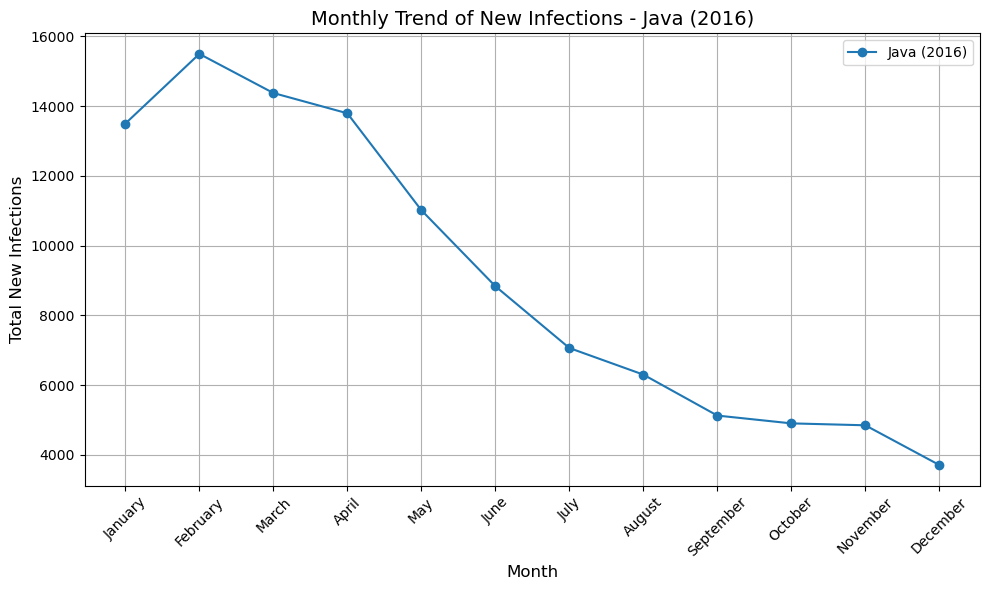

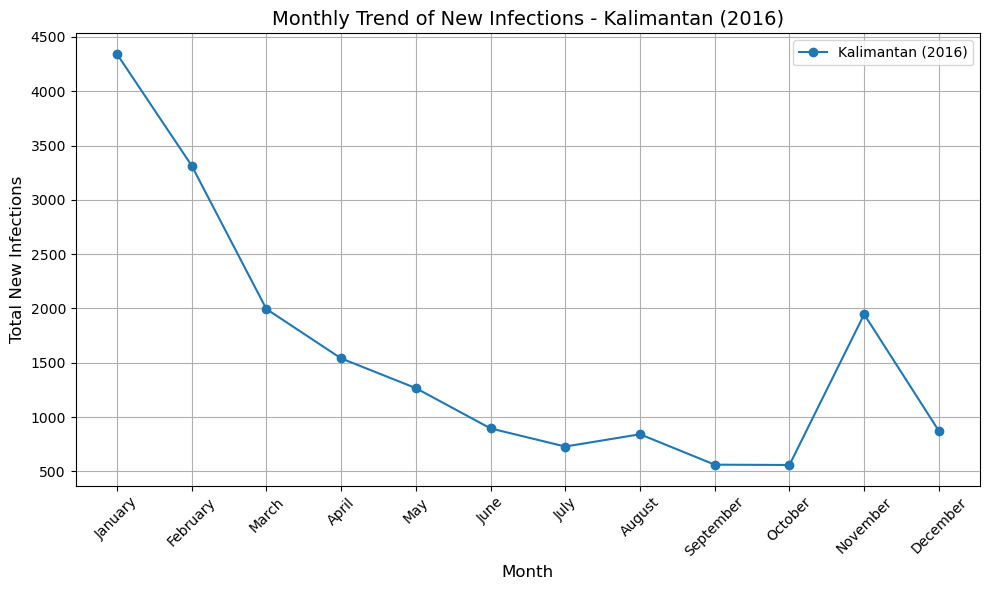

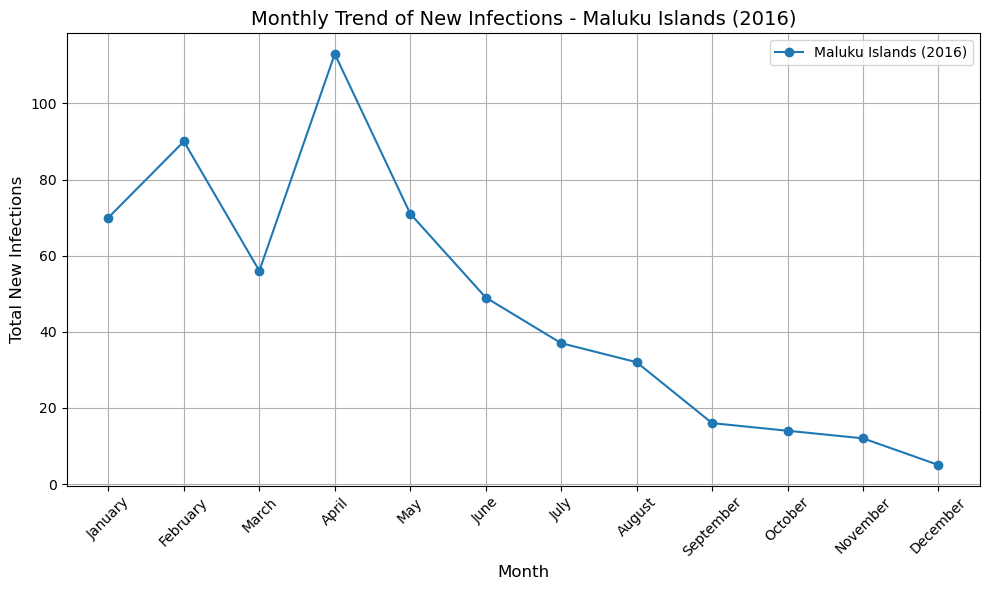

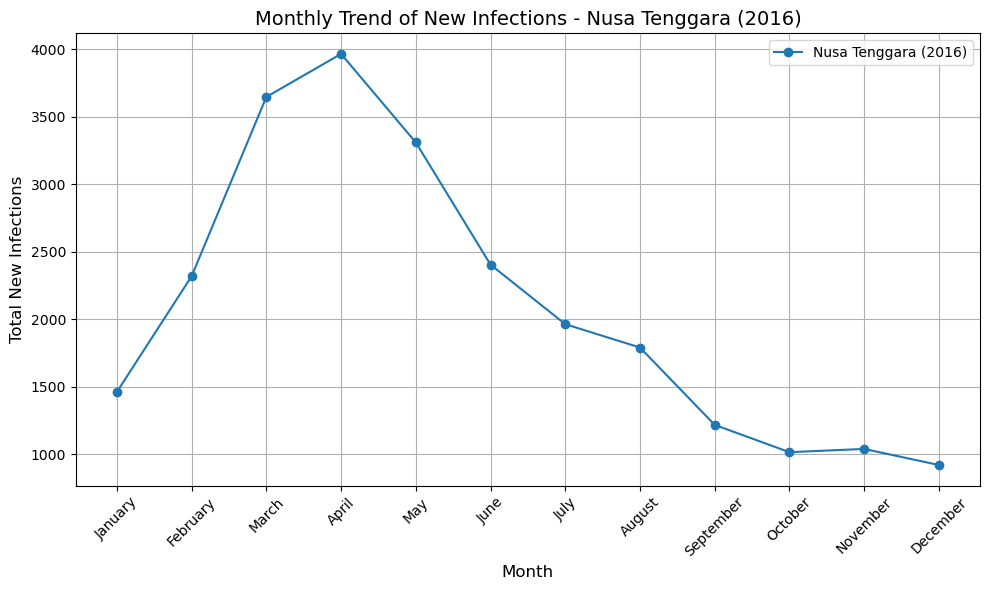

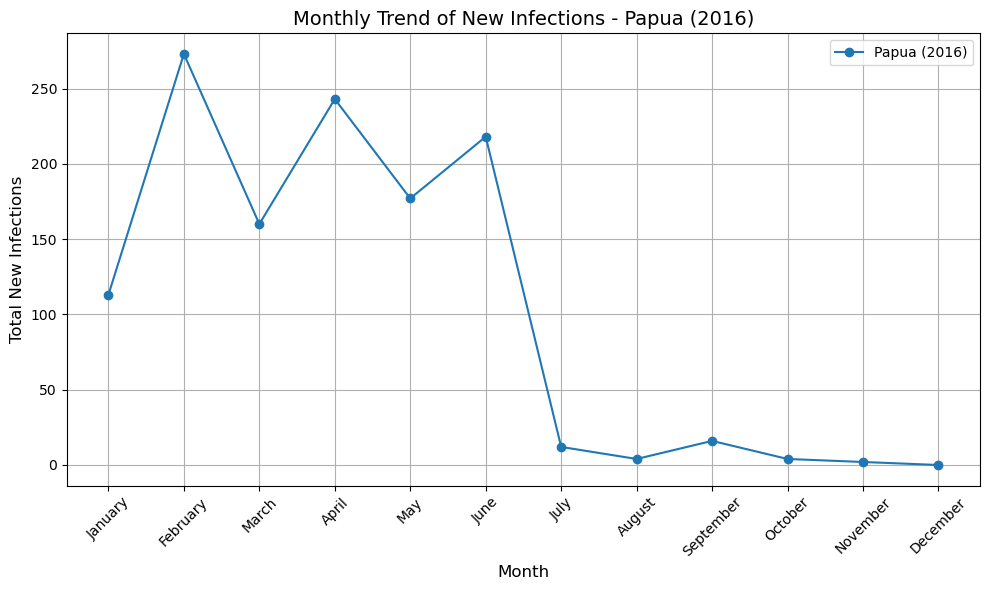

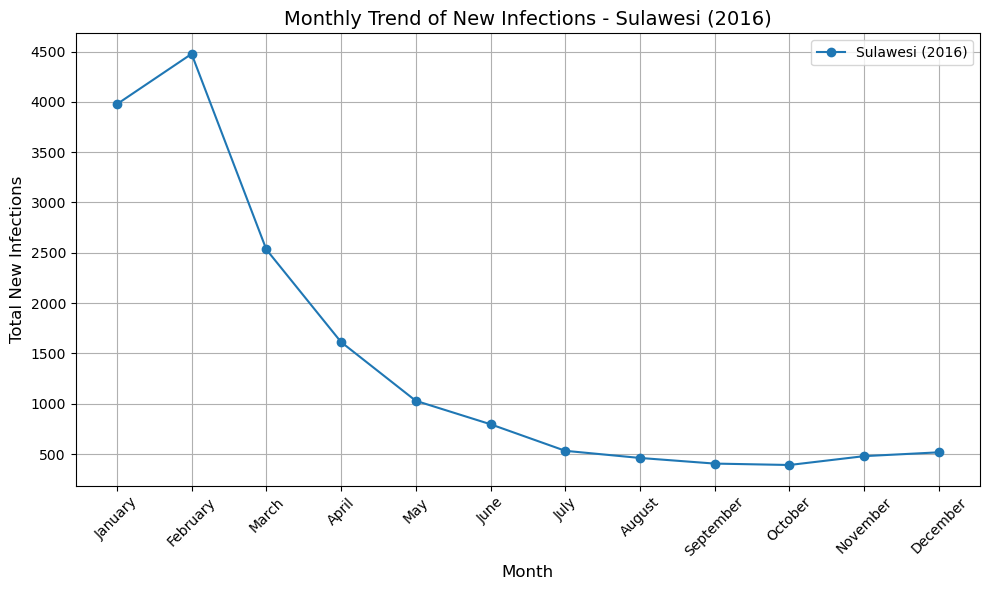

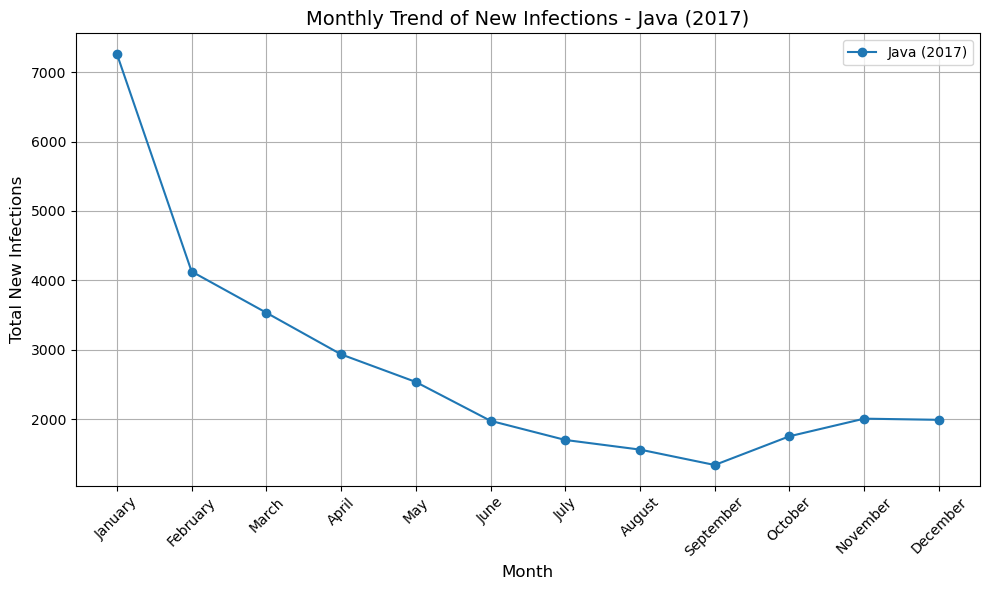

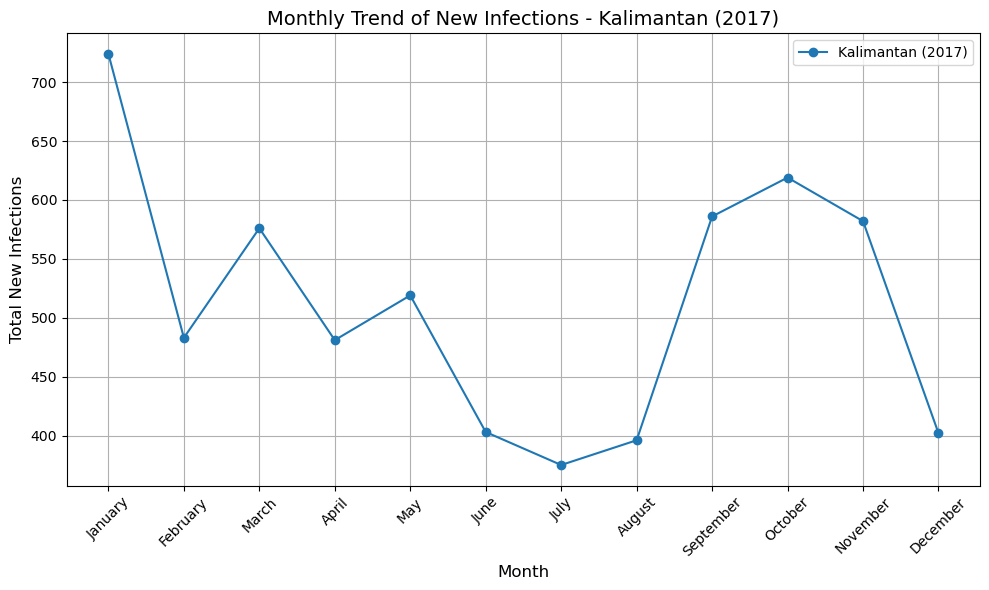

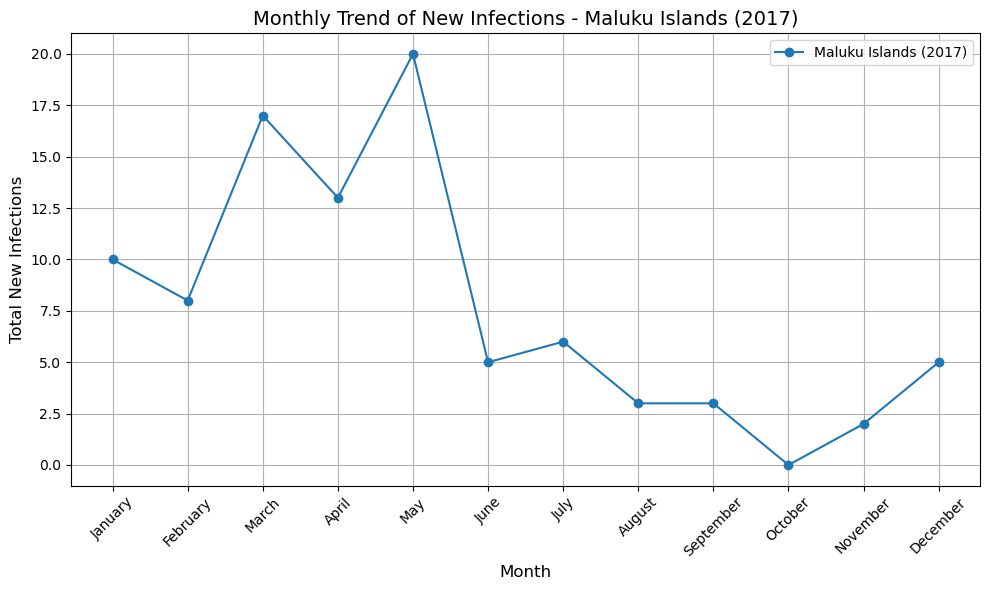

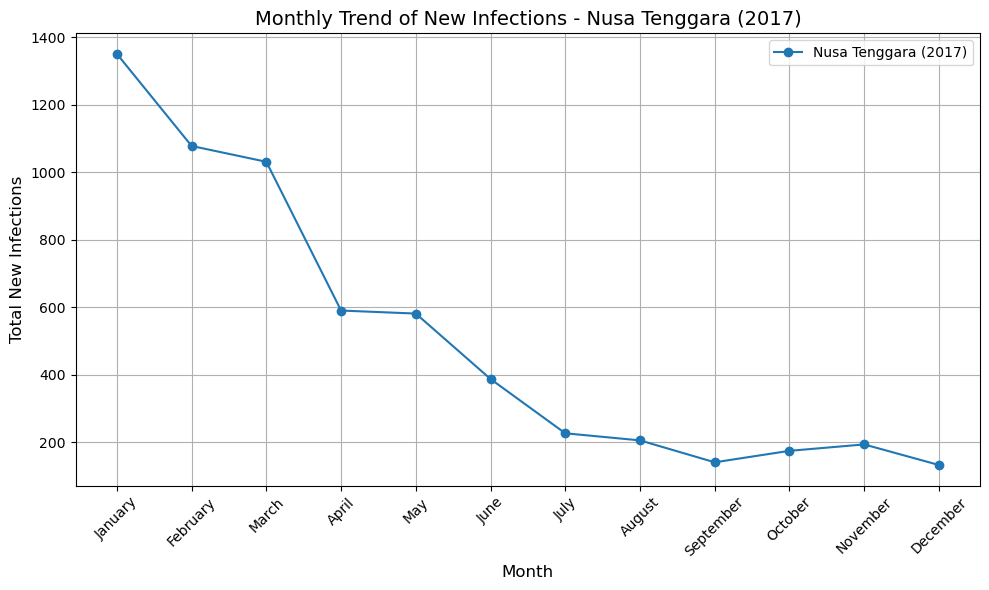

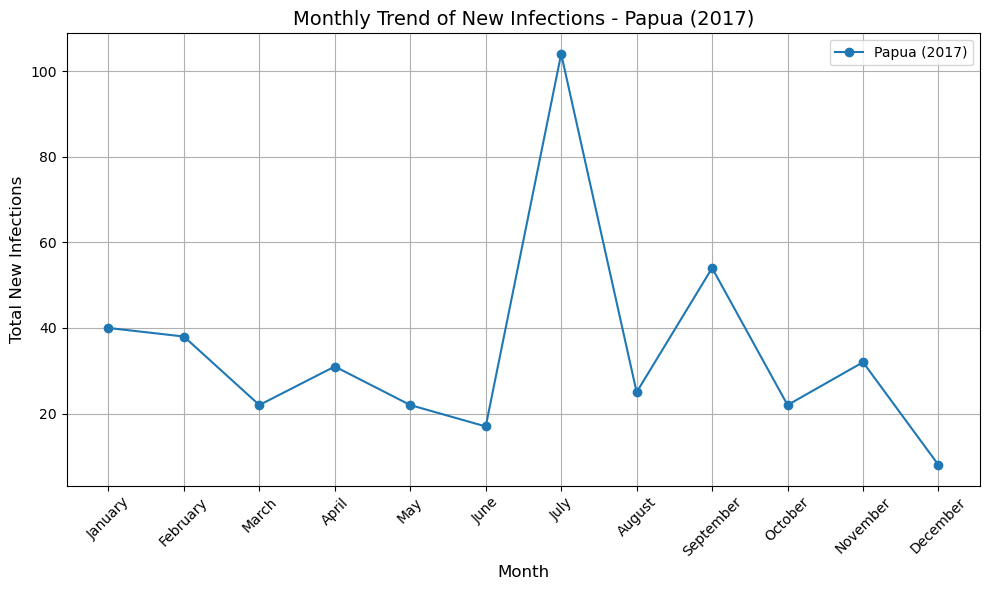

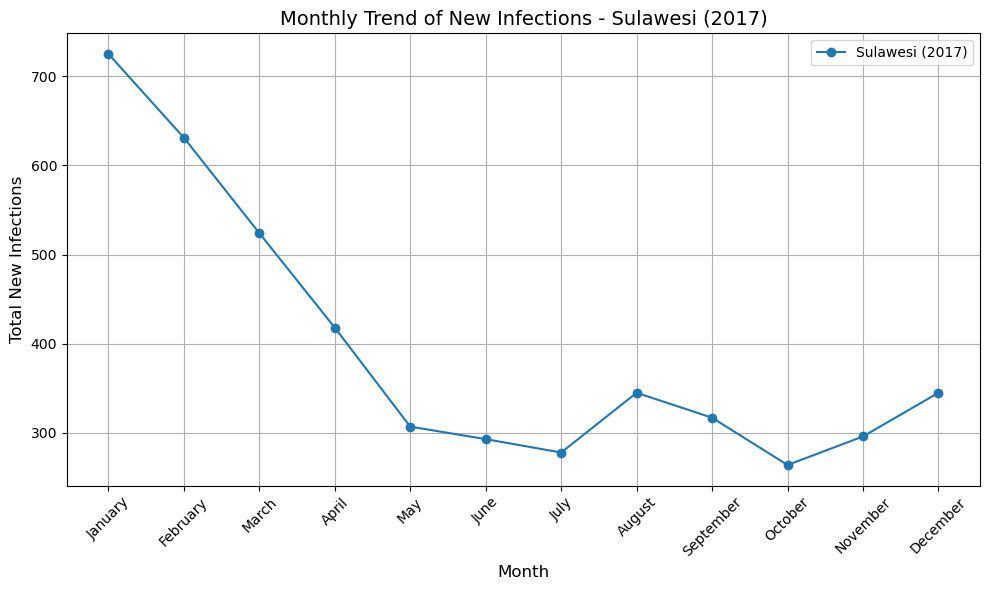

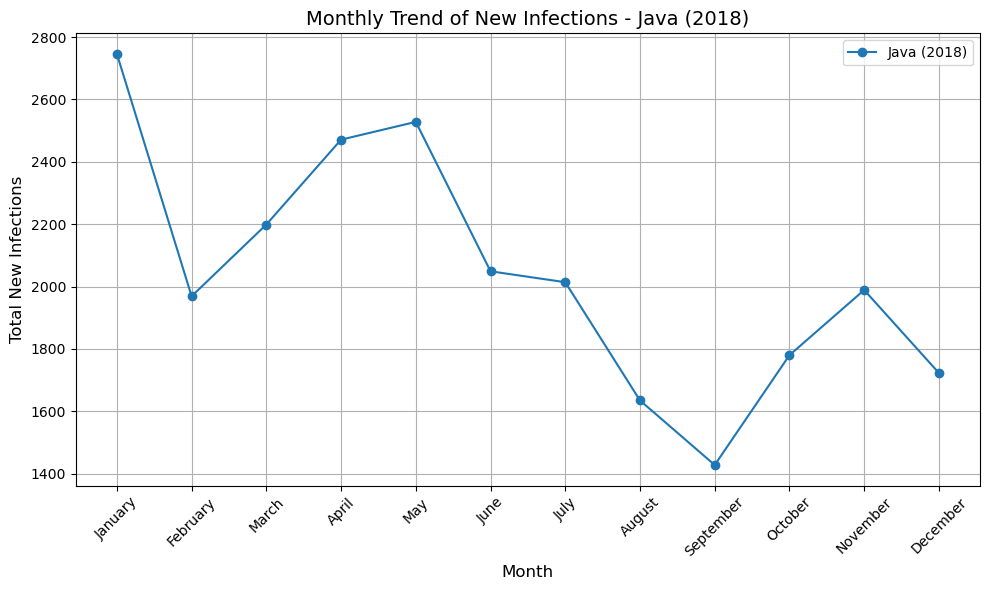

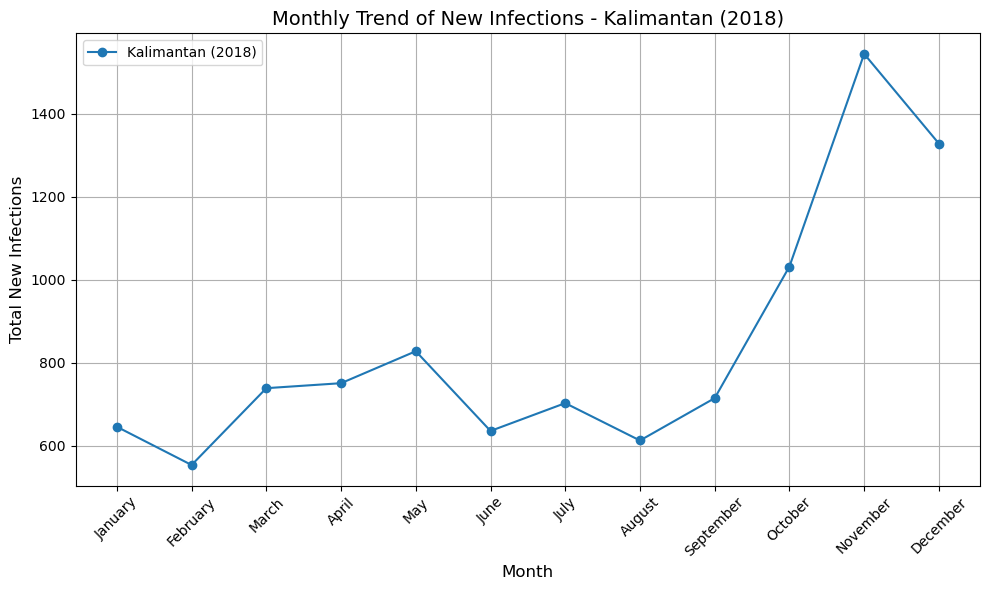

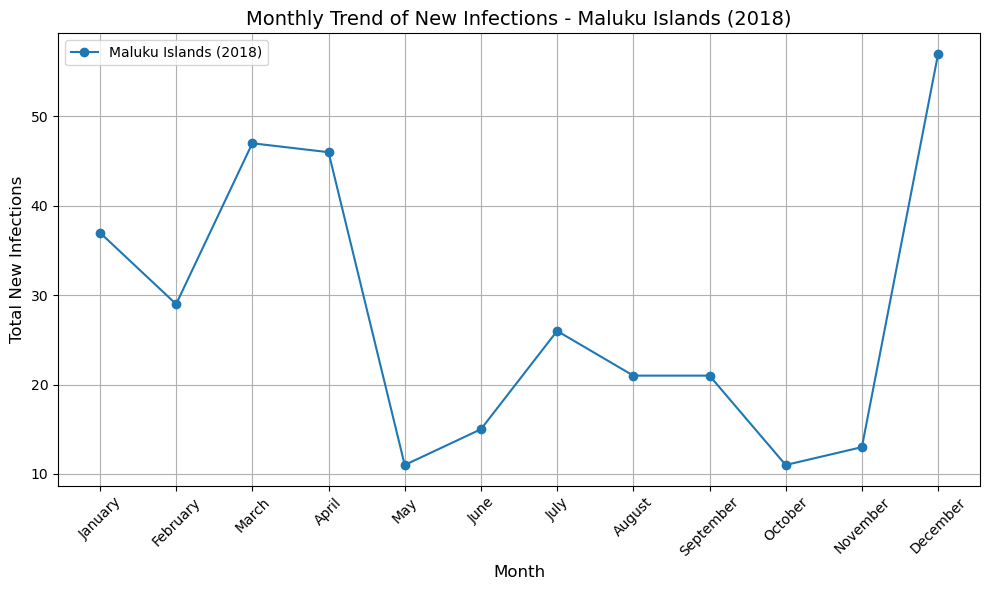

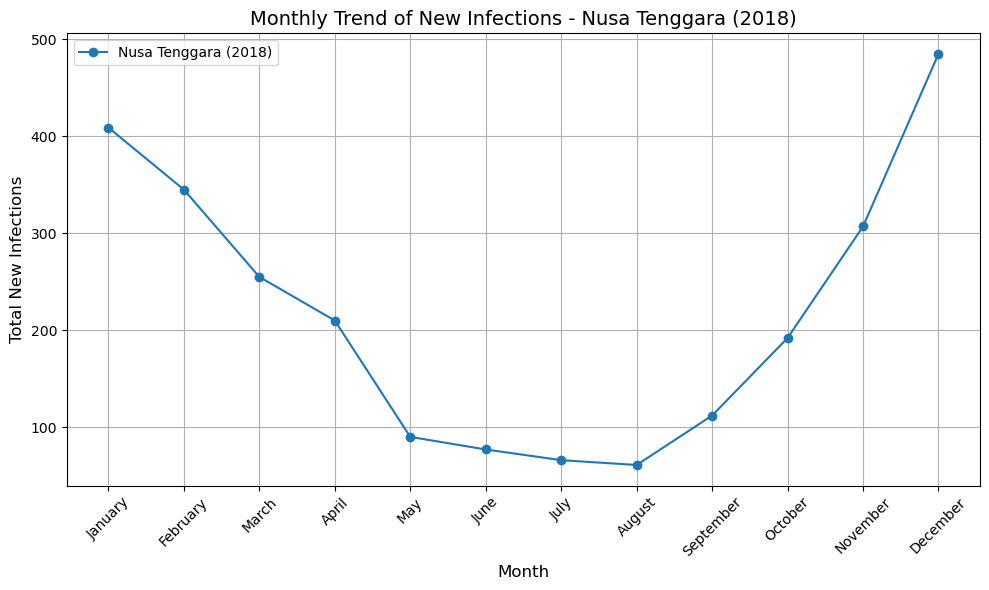

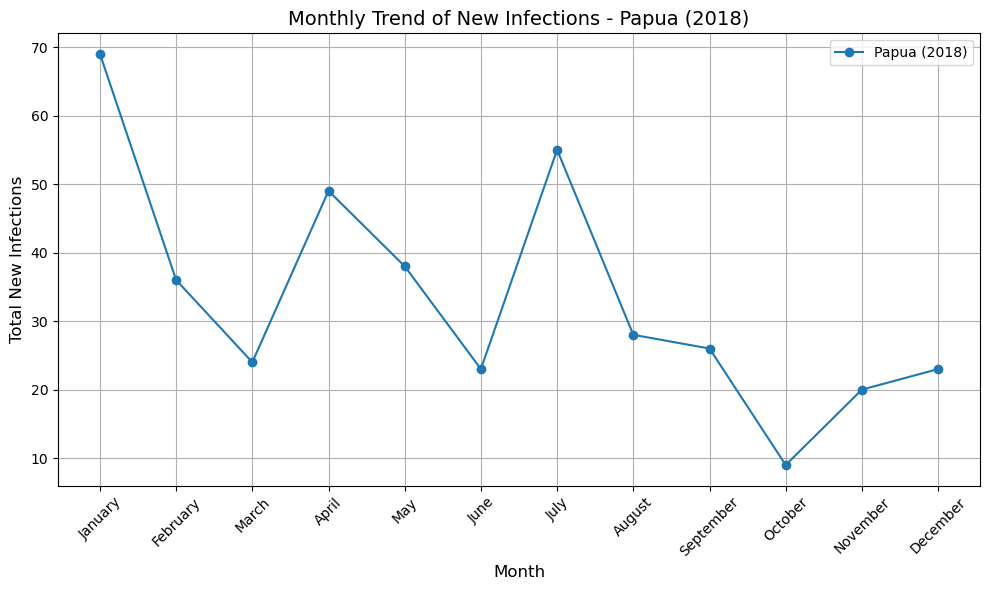

Error in callback <function flush_figures at 0x00000210F5961440> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_infection_trend_by_region_grid(df, year, save_dir):
    """
    Summarize monthly infection data and save a grid plot for all regions in a given year.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing infection data for a specific year.
    - year (int): The year corresponding to the dataframe.
    - save_dir (str): The directory to save the plot images.
    
    The dataframe must contain columns 'ID_2', 'Region', and 'Infection_1' to 'Infection_12'.
    """
    infection_columns = [f'Infection_{i}' for i in range(1, 13)]
    
    # Check if required columns exist in the dataframe
    required_columns = {'ID_2', 'Region'} | set(infection_columns)
    if not required_columns.issubset(df.columns):
        print(f"One or more required columns are missing in {year} data.")
        return
    
    # Convert all infection columns to numeric and handle missing values
    df[infection_columns] = df[infection_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Group by Region and sum infection counts
    grouped = df.groupby('Region')[infection_columns].sum()
    
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
              'September', 'October', 'November', 'December']
    
    regions = grouped.index.tolist()
    num_regions = len(regions)
    cols = 4  # Number of columns in the grid
    rows = math.ceil(num_regions / cols)  # Calculate required rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4), constrained_layout=True)
    axes = axes.flatten()  # Flatten to handle both single and multiple row cases
    
    for i, (region_name, data) in enumerate(grouped.iterrows()):
        ax = axes[i]
        ax.plot(months, data.values, marker='o', linestyle='-', label=f'{region_name}')
        ax.set_title(f'{region_name}', fontsize=10)
        ax.set_xlabel('Month', fontsize=8)
        ax.set_ylabel('New Infections', fontsize=8)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.grid(True)
        ax.legend(fontsize=8)
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(f'Monthly Infection Trends by Region ({year})', fontsize=14)
    
    # Save the plot
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f'infection_trends_{year}.png')
    plt.savefig(save_path, dpi=300)
    plt.close()
    print(f"Grid plot for {year} saved at {save_path}")

# Loop through years and generate plots for each year
global_save_dir = "infection_trends"
for year in range(2010, 2024):
    in_data = globals().get(f'in_{year}')
    if in_data is not None:
        plot_infection_trend_by_region_grid(in_data, year, global_save_dir)


In [ ]:
in_2010

Province             City  City/Regency Infection_1 Death_1  \
1          Aceh  Aceh Barat Daya       Regency           0       0   
2          Aceh       Aceh Barat       Regency           2       0   
3          Aceh       Aceh Besar       Regency          48       0   
4          Aceh        Aceh Jaya       Regency           0       0   
5          Aceh     Aceh Selatan       Regency          21       0   
..          ...              ...           ...         ...     ...   
440  Yogyakarta           Bantul       Regency         206       0   
441  Yogyakarta     Gunung Kidul       Regency         183       2   
442  Yogyakarta      Kulon Progo       Regency          52       0   
443  Yogyakarta           Sleman       Regency         148       1   
444  Yogyakarta       Yogyakarta  Municipality          70       0   

    Infection_2 Death_2 Infection_3 Death_3 Infection_4  ... Death_11  \
1             0       0           0       0           0  ...        0   
2             5       1           5       0           1  ...        0   
3            26       0          37       0          60  ...        0   
4             0       0           1       0           3  ...        0   
5            24       0          13       0           4  ...        0   
..          ...     ...         ...     ...         ...  ...      ...   
440         151       3         152       3         166  ...        0   
441         204       4         200       1         143  ...        1   
442          56       0          77       2          57  ...        0   
443         120       1          83       0          71  ...        0   
444          95       1         162       0         152  ...        0   

    Infection_12 Death_12 Total Incidence Total Death IR per 100000       CFR  \
1              1        0             1.0         0.0      0.870686  0.000000   
2              0        0            27.0         1.0     17.810731  3.703704   
3             81        2           539.0         3.0    180.108533  0.556586   
4              0        0             6.0         0.0      9.004682  0.000000   
5              9        0           108.0         0.0     57.170384  0.000000   
..           ...      ...             ...         ...           ...       ...   
440           76        0          1516.0         8.0    182.221394  0.527704   
441            2        1           944.0        14.0    131.559876  1.483051   
442           30        0           467.0         4.0    101.691741  0.856531   
443           30        0           600.0         2.0      65.09336  0.333333   
444           81        1          1470.0         6.0    284.009127  0.408163   

    Population New_ID_2 New_Region  
1     114852.0      1.0    Sumatra  
2     151594.0      2.0    Sumatra  
3     299264.0      3.0    Sumatra  
4      66632.0      4.0    Sumatra  
5     188909.0      5.0    Sumatra  
..         ...      ...        ...  
440   831955.0    440.0       Java  
441   717544.0    441.0       Java  
442   459231.0    442.0       Java  
443   921753.0    443.0       Java  
444   517589.0    444.0       Java  

[444 rows x 34 columns]

In [ ]:
import geopandas as gpd
import pandas as pd



# Reduce shapefile to relevant columns
shapefile_reduced = in_shp[['NAME_1', 'NAME_2', 'ENGTYPE_2', 'ID_2', 'Region']]

# Create a dictionary lookup for (NAME_1, NAME_2, ENGTYPE_2) → (ID_2, Region)
lookup_dict = {
    (row.NAME_1, row.NAME_2, row.ENGTYPE_2): (row.ID_2, row.Region) 
    for _, row in shapefile_reduced.iterrows()
}

# List of dataframes (assuming they're named in_2010, in_2011, ..., in_2023)
dataframes = [in_2010, in_2011, in_2012, in_2013, in_2014, in_2015, in_2016, 
              in_2017, in_2018, in_2019, in_2020, in_2021, in_2022, in_2023]

# Process each dataframe separately
for i, df in enumerate(dataframes, 2010):  # Iterating through years 2010-2023
    
    # Function to get (ID_2, Region) based on matching Province, City, City/Regency
    def map_values(row):
        return lookup_dict.get((row['Province'], row['City'], row['City/Regency']), (None, None))
    
    # Apply the function to get ID_2 and Region
    df[['ID_2', 'Region']] = df.apply(map_values, axis=1, result_type='expand')

    # Save updated dataframe (optional)
    df.to_csv(f'mapped_data_{i}.csv', index=False)

    # Optionally store back in the list if needed later
    dataframes[i - 2010] = df

# The dataframes now have 'New_ID_2' and 'New_Region' without merging extra data.


In [ ]:
merged_df.drop(columns=['Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31'])

Province             City  City/Regency Infection_1 Death_1  \
0          Aceh  Aceh Barat Daya       Regency           9       0   
1          Aceh       Aceh Barat       Regency           6       0   
2          Aceh       Aceh Besar       Regency          15       0   
3          Aceh        Aceh Jaya       Regency           7       0   
4          Aceh     Aceh Selatan       Regency           3       0   
..          ...              ...           ...         ...     ...   
439  Yogyakarta           Bantul       Regency         186       2   
440  Yogyakarta     Gunung Kidul       Regency         142       1   
441  Yogyakarta      Kulon Progo       Regency          26       0   
442  Yogyakarta           Sleman       Regency          93       0   
443  Yogyakarta       Yogyakarta  Municipality          34       0   

    Infection_2 Death_2 Infection_3 Death_3 Infection_4  ... Death_9  \
0             8       0           5       0           2  ...       0   
1             5       0           2       0           5  ...       0   
2            13       0           9       0           6  ...       0   
3             4       0           6       0           7  ...       0   
4             2       0           1       0           0  ...       0   
..          ...     ...         ...     ...         ...  ...     ...   
439         204       1         200       0         198  ...       0   
440         255       2         269       1         131  ...       0   
441          44       0          51       0          37  ...       1   
442         109       0         135       1         116  ...       0   
443          72       0          58       0          50  ...       0   

    Infection_10 Death_10 Infection_11 Death_11 Infection_12 Death_12  \
0              0        0            4        0            1        0   
1              0        0            1        0            1        0   
2              0        0            1        0            0        0   
3              0        0            0        0            0        0   
4              0        0            0        0            0        0   
..           ...      ...          ...      ...          ...      ...   
439           32        0           36        0           31        0   
440            6        0           17        0           14        0   
441           13        1           24        0           25        1   
442           16        0           25        0           21        0   
443            6        0           10        0            6        0   

    Total Incidence New_ID_2 New_Region  
0              32.0      1.0    Sumatra  
1              29.0      2.0    Sumatra  
2              71.0      3.0    Sumatra  
3              50.0      4.0    Sumatra  
4              10.0      5.0    Sumatra  
..              ...      ...        ...  
439          1222.0    440.0       Java  
440           975.0    441.0       Java  
441           315.0    442.0       Java  
442           810.0    443.0       Java  
443           296.0    444.0       Java  

[444 rows x 30 columns]

In [ ]:
def plot_combined_infection_trend(df_dict, save_dir):
    """
    Summarize monthly infection data from 2010 to 2023 and save a single plot.
    
    Parameters:
    - df_dict (dict): A dictionary where keys are years and values are dataframes
      containing infection data for each year.
    - save_dir (str): The directory to save the plot image.
    
    Each dataframe must contain columns 'Infection_1' to 'Infection_12', 
    each representing infection counts for each month from January to December.
    """
    # List of columns representing infection counts from January to December
    infection_columns = ['Infection_1', 'Infection_2', 'Infection_3', 'Infection_4', 
                         'Infection_5', 'Infection_6', 'Infection_7', 'Infection_8', 
                         'Infection_9', 'Infection_10', 'Infection_11', 'Infection_12']

    # Initialize a list to collect monthly infection totals for all years
    all_months = []
    all_infection_totals = []

    # Initialize a list to mark the year positions on the x-axis
    year_positions = []

    # Iterate over the years and process the infection data
    for year, df in df_dict.items():
        # Check if the infection columns exist in the dataframe
        if not all(col in df.columns for col in infection_columns):
            print(f"One or more infection columns are missing in {year} data.")
            continue

        # Exclude the first row (index 0) as it is null and we only want data from states
        df_clean = df[infection_columns].iloc[1:]  # Exclude first row

        # Convert all columns to numeric (to avoid issues with non-numeric values)
        df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

        # Handle missing values: Filling missing values with 0 (or another strategy)
        df_clean = df_clean.fillna(0)

        # Sum the infection data across all rows (states)
        monthly_totals = df_clean.sum(axis=0)

        # Append the months and corresponding totals to the lists
        months = [f"{month} {year}" for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                                                  'September', 'October', 'November', 'December']]
        all_months.extend(months)
        all_infection_totals.extend(monthly_totals)

        # Record the positions of the year labels for marking the year boundaries
        year_positions.append(len(all_months))  # This will correspond to the last month of each year

    # Plot the combined infection trend across all years
    plt.figure(figsize=(12, 6))
    plt.plot(all_months, all_infection_totals, marker='o', linestyle='-', color='b', label='Total New Infections (2010-2023)')

    # Add vertical red lines for each year boundary
    for year_pos in year_positions:
        plt.axvline(x=year_pos - 0.5, color='r', linestyle='--', lw=1)

    # Set the title and labels
    plt.title('Monthly Trend of New Infections in Indonesia (2010-2023)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total New Infections', fontsize=12)

    # Keep only the year labels on the x-axis
    year_labels = [f"{year}" for year in range(2010, 2024)]
    plt.xticks(year_positions, year_labels, rotation=45)  # Position the labels at the end of each year

    # Add grid and adjust layout
    plt.grid(True)
    plt.tight_layout()

    # Save the plot as a file in the specified directory
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  # Create directory if it doesn't exist
    save_path = os.path.join(save_dir, 'infection_trend_2010_to_2023.png')
    plt.savefig(save_path)

    # Close the plot to free memory
    plt.close()
    print(f"Combined plot for 2010-2023 saved at {save_path}")

# Assuming df_dict contains all the yearly dataframes, e.g., in_2010, in_2011, ..., in_2023
df_dict = {
    2010: in_2010,
    2011: in_2011,
    2012: in_2012,
    2013: in_2013,
    2014: in_2014,
    2015: in_2015,
    2016: in_2016,
    2017: in_2017,
    2018: in_2018,
    2019: in_2019,
    2020: in_2020,
    2021: in_2021,
    2022: in_2022,
    2023: in_2023
}

# Plot and save the combined trend

plot_combined_infection_trend(df_dict, save_dir)


Combined plot for 2010-2023 saved at D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321\infection_trend_2010_to_2023.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_combined_infection_trend(df_dict, save_dir):
    """
    Summarize monthly infection data from 2010 to 2023 and save a single plot.
    
    Parameters:
    - df_dict (dict): A dictionary where keys are years and values are dataframes
      containing infection data for each year.
    - save_dir (str): The directory to save the plot image.
    
    Each dataframe must contain a 'Region' column and columns 'Infection_1' to 'Infection_12', 
    each representing infection counts for each month from January to December.
    """
    infection_columns = [f'Infection_{i}' for i in range(1, 13)]
    regions = set()
    monthly_data = {}
    
    for year, df in df_dict.items():
        if not {'Region'}.union(set(infection_columns)).issubset(df.columns):
            print(f"Missing required columns in {year} data.")
            continue
        
        df_clean = df[['Region'] + infection_columns].iloc[1:].copy()
        df_clean[infection_columns] = df_clean[infection_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
        
        for region in df_clean['Region'].unique():
            if region not in monthly_data:
                monthly_data[region] = []
            
            region_data = df_clean[df_clean['Region'] == region][infection_columns].sum(axis=0)
            monthly_data[region].extend(region_data)
            regions.add(region)
    
    plt.figure(figsize=(12, 6))
    for region in sorted(regions):
        if region in monthly_data:
            plt.plot(monthly_data[region], marker='o', linestyle='-', label=region)
    
    plt.title('Monthly Trend of New Infections by Region (2010-2023)', fontsize=14)
    plt.xlabel('Month-Year', fontsize=12)
    plt.ylabel('Total New Infections', fontsize=12)
    plt.legend(title='Region')
    plt.grid(True)
    plt.tight_layout()
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_path = os.path.join(save_dir, 'infection_trend_by_region_2010_to_2023.png')
    plt.savefig(save_path)
    plt.close()
    print(f"Combined plot for 2010-2023 saved at {save_path}")


Visualise on SHP file the areas of interest in a given year.

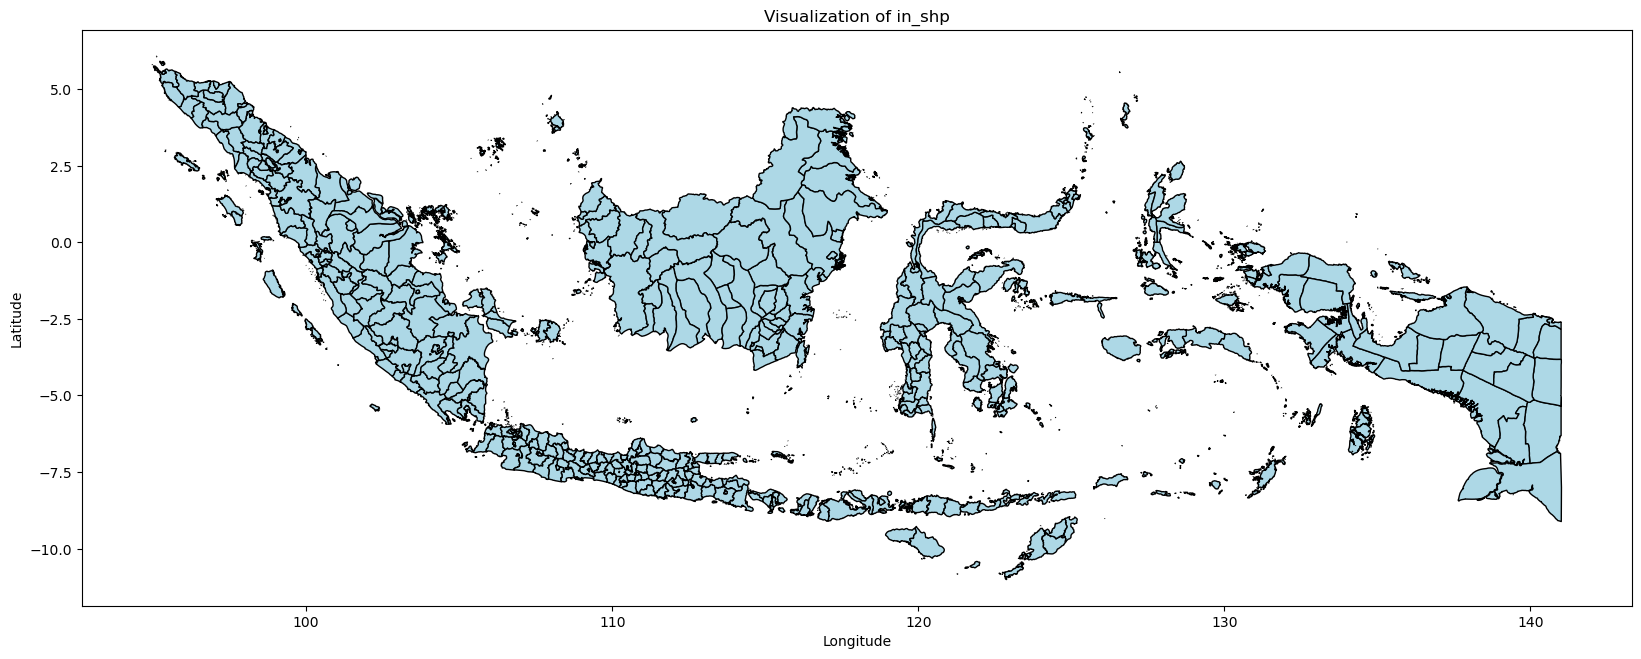

In [ ]:
# Read in Indonesia shapefile
in_shp = gpd.read_file(r"D:\Projects\TMU\gee_dengue\Dengue_IN\in_shp\Simplify_IDN")
fig, ax = plt.subplots(figsize=(20, 10))
in_shp.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Visualization of in_shp")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
sumatra = ['Aceh', 'Bangka-Belitung', 'Bengkulu', 'Jambi', 'Kepulauan Riau', 'Lampung', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara' ]
nusa_tenggara = ['Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur']
java = ['Banten', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Riau', 'Yogyakarta', 'Jakarta Raya']
sulawesi = ['Gorontalo','Bengkulu', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara']
kalimantan = ['Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara']
maluku_islands = ['Maluku Utara', 'Maluku']
papua = ['Papua', 'Irian Jaya Barat']

# Create a region lookup dictionary
region_mapping = {province: 'Sumatra' for province in sumatra}
region_mapping.update({province: 'Nusa Tenggara' for province in nusa_tenggara})
region_mapping.update({province: 'Java' for province in java})
region_mapping.update({province: 'Sulawesi' for province in sulawesi})
region_mapping.update({province: 'Kalimantan' for province in kalimantan})
region_mapping.update({province: 'Maluku Islands' for province in maluku_islands})
region_mapping.update({province: 'Papua' for province in papua})

# Assign regions to a new column based on NAME_1
in_shp['Region'] = in_shp['NAME_1'].map(region_mapping).fillna('Unknown')

In [ ]:
in_shp

NAME_0      NAME_1  ID_2           NAME_2     ENGTYPE_2  \
0    Indonesia        Aceh     1  Aceh Barat Daya       Regency   
1    Indonesia        Aceh     2       Aceh Barat       Regency   
2    Indonesia        Aceh     3       Aceh Besar       Regency   
3    Indonesia        Aceh     4        Aceh Jaya       Regency   
4    Indonesia        Aceh     5     Aceh Selatan       Regency   
..         ...         ...   ...              ...           ...   
439  Indonesia  Yogyakarta   440           Bantul       Regency   
440  Indonesia  Yogyakarta   441     Gunung Kidul       Regency   
441  Indonesia  Yogyakarta   442      Kulon Progo       Regency   
442  Indonesia  Yogyakarta   443           Sleman       Regency   
443  Indonesia  Yogyakarta   444       Yogyakarta  Municipality   

           VARNAME_2  InPoly_FID  MaxSimpTol  MinSimpTol  NEW_ID  \
0    South West Aceh           0    0.008993    0.008993       1   
1          West Aceh           1    0.008993    0.008993       2   
2               None           2    0.008993    0.008993       3   
3               None           3    0.008993    0.008993       4   
4         South Aceh           4    0.008993    0.008993       5   
..               ...         ...         ...         ...     ...   
439             None         439    0.008993    0.008993     440   
440             None         440    0.008993    0.008993     441   
441             None         441    0.008993    0.008993     442   
442             None         442    0.008993    0.008993     443   
443  Kota Yogyakarta         443    0.008993    0.008993     444   

                                              geometry   Region  
0    MULTIPOLYGON (((96.90573 3.60124, 96.89619 3.6...  Sumatra  
1    POLYGON ((96.57126 4.57926, 96.54819 4.56584, ...  Sumatra  
2    MULTIPOLYGON (((94.97379 5.78853, 94.97248 5.7...  Sumatra  
3    MULTIPOLYGON (((95.83961 4.40411, 95.80329 4.4...  Sumatra  
4    MULTIPOLYGON (((97.65528 2.60139, 97.65083 2.6...  Sumatra  
..                                                 ...      ...  
439  POLYGON ((110.21078 -7.98217, 110.23051 -7.973...     Java  
440  POLYGON ((110.70204 -8.18505, 110.68945 -8.186...     Java  
441  MULTIPOLYGON (((110.141 -7.65003, 110.15433 -7...     Java  
442  POLYGON ((110.24358 -7.81681, 110.24183 -7.787...     Java  
443  POLYGON ((110.35185 -7.79946, 110.34948 -7.787...     Java  

[444 rows x 12 columns]